___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# #Determines

**Auto Scout** data which using for this project, scraped from the on-line car trading company(https://www.autoscout24.com)in 2019, contains many features of 9 different car models. In this project, you will use the data set which is already preprocessed and prepared for algorithms .

The aim of this project to understand of machine learning algorithms. Therefore, you will not need any EDA process as you will be working on the edited data.

---

In this Senario, you will estimate the prices of cars using regression algorithms.

While starting you should import the necessary modules and load the data given as pkl file. Also you'll need to do a few pre-processing before moving to modelling. After that you will implement ***Linear Regression, Ridge Regression, Lasso Regression,and Elastic-Net algorithms respectively*** (After completion of Unsupervised Learning section, you can also add bagging and boosting algorithms such as ***Random Forest and XG Boost*** this notebook to develop the project. You can measure the success of your models with regression evaluation metrics as well as with cross validation method.

For the better results, you should try to increase the success of your models by performing hyperparameter tuning. Determine feature importances for the model. You can set your model with the most important features for resource saving. You should try to apply this especially in Random Forest and XG Boost algorithms. Unlike the others, you will perform hyperparameter tuning for Random Forest and XG Boost using the ***GridSearchCV*** method. 

Finally You can compare the performances of algorithms, work more on the algorithm have the most successful prediction rate.






# #Tasks

#### 1. Import Modules, Load Data and Data Review
#### 2. Data Pre-Processing
#### 3. Implement Linear Regression 
#### 4. Implement Ridge Regression
#### 5. Implement Lasso Regression 
#### 6. Implement Elastic-Net
#### 7. Visually Compare Models Performance In a Graph

## 1. Import Modules, Load Data and Data Review

In [1]:
import pandas as pd      
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

from scipy.stats import skew

from sklearn.model_selection import cross_validate

plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

In [2]:
#!pip install -U scikit-learn

In [3]:
import sklearn
sklearn.__version__

'1.0.2'

In [4]:
df = pd.read_csv("final_scout_not_dummy2.csv")

In [5]:
df.head()

,make_model,body_type,price,km,Type,Fuel,Extras,Gears,age,Previous_Owners,hp_kW,Inspection_new,Paint_Type,Upholstery_type,Gearing_Type,Displacement_cc,Weight_kg,Drive_chain,cons_comb,CO2_Emission,Comfort_Convenience_Package,Entertainment_Media_Package,Safety_Security_Package
0,Audi A1,Sedans,15770,56013.0,Used,Diesel,"Alloy wheels, Catalytic Converter, Voice Control",7.0,3.0,2.0,66.0,1,Metallic,Cloth,Automatic,1422.0,1220.0,front,3.8,99.0,Premium,Plus,Safety Premium Package
1,Audi A1,Sedans,14500,80000.0,Used,Benzine,"Alloy wheels, Sport seats, Sport suspension, V...",7.0,2.0,1.0,141.0,0,Metallic,Cloth,Automatic,1798.0,1255.0,front,5.6,129.0,Standard,Plus,Safety Premium Package
2,Audi A1,Sedans,14640,83450.0,Used,Diesel,"Alloy wheels, Voice Control",7.0,3.0,1.0,85.0,0,Metallic,Cloth,Automatic,1598.0,1135.0,front,3.8,99.0,Premium,Standard,Safety Premium Package
3,Audi A1,Sedans,14500,73000.0,Used,Diesel,"Alloy wheels, Sport seats, Voice Control",6.0,3.0,1.0,66.0,0,Metallic,Cloth,Automatic,1422.0,1195.0,front,3.8,99.0,Standard,Plus,Safety Premium Package
4,Audi A1,Sedans,16790,16200.0,Used,Diesel,"Alloy wheels, Sport package, Sport suspension,...",7.0,3.0,1.0,66.0,1,Metallic,Cloth,Automatic,1422.0,1135.0,front,4.1,109.0,Premium,Plus,Safety Premium Package


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15909 entries, 0 to 15908
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   make_model                   15909 non-null  object 
 1   body_type                    15909 non-null  object 
 2   price                        15909 non-null  int64  
 3   km                           15909 non-null  float64
 4   Type                         15909 non-null  object 
 5   Fuel                         15909 non-null  object 
 6   Extras                       15909 non-null  object 
 7   Gears                        15909 non-null  float64
 8   age                          15909 non-null  float64
 9   Previous_Owners              15909 non-null  float64
 10  hp_kW                        15909 non-null  float64
 11  Inspection_new               15909 non-null  int64  
 12  Paint_Type                   15909 non-null  object 
 13  Upholstery_type 

In [7]:
df.describe()

,price,km,Gears,age,Previous_Owners,hp_kW,Inspection_new,Displacement_cc,Weight_kg,cons_comb,CO2_Emission
count,15909.000000,15909.000000,15909.000000,15909.000000,15909.000000,15909.000000,15909.000000,15909.000000,15909.000000,15909.000000,15909.000000
mean,18020.241876,32092.436526,5.937268,1.389591,1.042869,88.493746,0.247156,1428.657364,1337.675467,4.824329,117.783110
std,7377.200813,36982.838757,0.704943,1.121355,0.339241,26.671943,0.431372,275.852413,199.672043,0.887890,18.022786
min,4950.000000,0.000000,5.000000,0.000000,0.000000,40.000000,0.000000,890.000000,840.000000,3.000000,45.000000
25%,12850.000000,1913.000000,5.000000,0.000000,1.000000,66.000000,0.000000,1229.000000,1165.000000,4.000000,104.000000
50%,16900.000000,20410.000000,6.000000,1.000000,1.000000,85.000000,0.000000,1461.000000,1295.000000,4.800000,117.000000
75%,21900.000000,46900.000000,6.000000,2.000000,1.000000,103.000000,0.000000,1598.000000,1472.000000,5.400000,129.000000
max,74600.000000,317000.000000,8.000000,3.000000,4.000000,294.000000,1.000000,2967.000000,2471.000000,9.100000,253.000000


In [8]:
df.isnull().sum()

make_model                     0
body_type                      0
price                          0
km                             0
Type                           0
Fuel                           0
Extras                         0
Gears                          0
age                            0
Previous_Owners                0
hp_kW                          0
Inspection_new                 0
Paint_Type                     0
Upholstery_type                0
Gearing_Type                   0
Displacement_cc                0
Weight_kg                      0
Drive_chain                    0
cons_comb                      0
CO2_Emission                   0
Comfort_Convenience_Package    0
Entertainment_Media_Package    0
Safety_Security_Package        0
dtype: int64

## Feature Engineering

In [9]:
df_object = df.select_dtypes(include="object").head()
df_object

# select_dtypes(include="object") to only include the columns of object dtype.

,make_model,body_type,Type,Fuel,Extras,Paint_Type,Upholstery_type,Gearing_Type,Drive_chain,Comfort_Convenience_Package,Entertainment_Media_Package,Safety_Security_Package
0,Audi A1,Sedans,Used,Diesel,"Alloy wheels, Catalytic Converter, Voice Control",Metallic,Cloth,Automatic,front,Premium,Plus,Safety Premium Package
1,Audi A1,Sedans,Used,Benzine,"Alloy wheels, Sport seats, Sport suspension, V...",Metallic,Cloth,Automatic,front,Standard,Plus,Safety Premium Package
2,Audi A1,Sedans,Used,Diesel,"Alloy wheels, Voice Control",Metallic,Cloth,Automatic,front,Premium,Standard,Safety Premium Package
3,Audi A1,Sedans,Used,Diesel,"Alloy wheels, Sport seats, Voice Control",Metallic,Cloth,Automatic,front,Standard,Plus,Safety Premium Package
4,Audi A1,Sedans,Used,Diesel,"Alloy wheels, Sport package, Sport suspension,...",Metallic,Cloth,Automatic,front,Premium,Plus,Safety Premium Package


In [10]:
for col in df_object:
    print(f"{col:<30}:", df[col].nunique())

# <30 here sets the character length before the column (:) so that all of the outputs are aligned.

make_model                    : 8
body_type                     : 8
Type                          : 5
Fuel                          : 3
Extras                        : 659
Paint_Type                    : 3
Upholstery_type               : 2
Gearing_Type                  : 3
Drive_chain                   : 3
Comfort_Convenience_Package   : 3
Entertainment_Media_Package   : 2
Safety_Security_Package       : 3


### Converting the Extras feature from object to numeric

In [11]:
for i in df.Extras:
    print(i)

# We want to preprocess this feature, as from our domain knowledge, the number of extras a car has plays an important role in its price.
# Keep in mind that this variable does not consist of atomic values.

Alloy wheels, Catalytic Converter, Voice Control
Alloy wheels, Sport seats, Sport suspension, Voice Control
Alloy wheels, Voice Control
Alloy wheels, Sport seats, Voice Control
Alloy wheels, Sport package, Sport suspension, Voice Control
Alloy wheels, Sport package, Sport seats, Sport suspension
Alloy wheels, Sport package, Sport seats, Sport suspension
Alloy wheels
Alloy wheels
Alloy wheels
Alloy wheels, Shift paddles
Alloy wheels, Sport seats
Alloy wheels, Catalytic Converter, Sport package, Sport seats, Sport suspension, Voice Control
Alloy wheels, Sport seats, Sport suspension
Alloy wheels, Sport seats, Sport suspension
Alloy wheels
Alloy wheels, Sport package, Sport seats
Alloy wheels, Sport package
Alloy wheels
Alloy wheels, Catalytic Converter, Shift paddles, Voice Control
Alloy wheels, Shift paddles, Sport package, Voice Control
Alloy wheels, Sport seats, Voice Control
Alloy wheels, Catalytic Converter, Sport seats, Voice Control, Winter tyres
Alloy wheels
Alloy wheels, Voice C

In [12]:
for i in df.Extras:
    print(len(i.split(",")))

# print out the number of extras in each record.

3
4
2
3
4
4
4
1
1
1
2
2
6
3
3
1
3
2
1
4
4
3
5
1
2
2
2
1
1
1
1
2
2
1
1
1
1
1
3
2
1
1
1
1
1
2
1
1
3
3
2
1
3
1
1
1
1
1
3
1
3
3
3
1
1
1
2
1
6
3
3
3
4
4
2
4
3
4
5
3
1
4
4
4
1
5
1
2
4
6
2
2
4
3
1
1
1
1
5
2
1
1
1
1
3
3
3
1
3
2
3
1
2
3
3
1
3
4
1
3
2
2
1
1
4
3
2
5
2
2
1
1
3
3
1
2
3
3
3
2
2
1
6
4
2
3
2
3
3
3
2
1
3
3
1
2
3
2
1
1
4
3
3
1
3
4
2
4
1
3
1
2
2
1
2
3
2
4
3
2
3
2
2
3
5
2
3
3
5
1
1
1
4
1
3
1
2
3
1
1
4
3
2
1
4
1
4
3
1
2
2
2
1
1
2
3
4
1
2
3
1
5
1
3
2
1
1
3
1
1
5
1
2
3
2
3
2
1
3
1
5
3
1
1
4
1
3
1
4
7
3
4
1
2
4
3
2
3
4
4
2
1
1
1
2
2
4
2
4
1
3
2
2
3
1
4
3
1
2
3
5
2
3
1
2
1
1
4
4
2
5
4
4
4
4
4
4
4
4
2
4
1
4
2
4
1
1
1
2
1
2
4
4
4
4
4
4
4
4
4
4
4
4
1
4
4
4
2
2
3
1
1
2
1
1
2
3
3
2
3
3
3
3
3
3
3
3
2
3
3
3
3
3
3
1
2
3
3
3
3
3
3
3
2
2
6
4
2
6
1
4
5
2
2
3
3
3
3
3
3
5
2
4
3
3
3
2
2
1
3
2
1
3
3
3
2
3
5
1
1
3
5
1
1
4
1
1
1
2
1
3
3
2
4
3
3
3
4
1
1
1
1
3
1
3
5
1
2
4
1
4
3
3
5
2
1
1
2
1
2
2
2
1
3
1
1
8
7
2
1
1
2
2
1
5
1
3
4
4
3
2
1
1
1
3
4
1
1
1
1
1
1
1
2
1
2
1
2
2
1
1
4
2
3
1
1
1
1
1
4
1
4
3
2
2
2
3
1
5
1


In [13]:
df.Extras.apply(lambda x: len(x.split(',')))

# We can also do it like this. Remember that whenever you find yourself using a loop over a dataframe, you're probably making a mistake as
# there will almost always a better way of doing it in pandas than looping the DF.

0        3
1        4
2        2
3        3
4        4
        ..
15904    2
15905    3
15906    1
15907    2
15908    2
Name: Extras, Length: 15909, dtype: int64

In [14]:
df["Extras"] = df.Extras.apply(lambda x: len(x.split(',')))

# Replacing Extras with the number of extras each record has.

In [15]:
df.head()  # confirm the change.

,make_model,body_type,price,km,Type,Fuel,Extras,Gears,age,Previous_Owners,hp_kW,Inspection_new,Paint_Type,Upholstery_type,Gearing_Type,Displacement_cc,Weight_kg,Drive_chain,cons_comb,CO2_Emission,Comfort_Convenience_Package,Entertainment_Media_Package,Safety_Security_Package
0,Audi A1,Sedans,15770,56013.0,Used,Diesel,3,7.0,3.0,2.0,66.0,1,Metallic,Cloth,Automatic,1422.0,1220.0,front,3.8,99.0,Premium,Plus,Safety Premium Package
1,Audi A1,Sedans,14500,80000.0,Used,Benzine,4,7.0,2.0,1.0,141.0,0,Metallic,Cloth,Automatic,1798.0,1255.0,front,5.6,129.0,Standard,Plus,Safety Premium Package
2,Audi A1,Sedans,14640,83450.0,Used,Diesel,2,7.0,3.0,1.0,85.0,0,Metallic,Cloth,Automatic,1598.0,1135.0,front,3.8,99.0,Premium,Standard,Safety Premium Package
3,Audi A1,Sedans,14500,73000.0,Used,Diesel,3,6.0,3.0,1.0,66.0,0,Metallic,Cloth,Automatic,1422.0,1195.0,front,3.8,99.0,Standard,Plus,Safety Premium Package
4,Audi A1,Sedans,16790,16200.0,Used,Diesel,4,7.0,3.0,1.0,66.0,1,Metallic,Cloth,Automatic,1422.0,1135.0,front,4.1,109.0,Premium,Plus,Safety Premium Package


In [16]:
df.Extras.nunique()  # Got to 10 unique values from 659. Huge reduction in cardinality.

10

In [17]:
df.Extras.unique()

array([ 3,  4,  2,  1,  6,  5,  7,  8, 10,  9], dtype=int64)

In [18]:
for i in df.select_dtypes("object"):
    print(f"{i:<30}:", df[i].unique())
    
# We can see that the first 8 features should be encoded with onehotencoder, whereas the last 3 ones with ordinalencoder.
# OneHotEncoder:
# It encodes nominal categorical variables as dummy variables. We use this in case of nominal variables to avoid hinting our model that
# there's an underlying logical order to our values when in reality that's not the case.

# OrdinalEncoder:
# If there's a logical order to your values (good, bad, worse) (warm, hot, hottest), we will use
# OrdinalEncoder to encode our variables numerically such that we preserve their logical order.
# See statistical variable types for more info.

make_model                    : ['Audi A1' 'Audi A3' 'Opel Astra' 'Opel Corsa' 'Opel Insignia'
 'Renault Clio' 'Renault Duster' 'Renault Espace']
body_type                     : ['Sedans' 'Station wagon' 'Compact' 'Coupe' 'Van' 'Convertible' 'Off-Road'
 'Transporter']
Type                          : ['Used' "Employee's car" 'New' 'Demonstration' 'Pre-registered']
Fuel                          : ['Diesel' 'Benzine' 'LPG/CNG']
Paint_Type                    : ['Metallic' 'Uni/basic' 'Perl effect']
Upholstery_type               : ['Cloth' 'Part/Full Leather']
Gearing_Type                  : ['Automatic' 'Manual' 'Semi-automatic']
Drive_chain                   : ['front' '4WD' 'rear']
Comfort_Convenience_Package   : ['Premium' 'Standard' 'Premium Plus']
Entertainment_Media_Package   : ['Plus' 'Standard']
Safety_Security_Package       : ['Safety Premium Package' 'Safety Premium Plus Package'
 'Safety Standard Package']


In [19]:
df.make_model.value_counts()

Audi A3           3093
Audi A1           2614
Opel Insignia     2598
Opel Astra        2525
Opel Corsa        2216
Renault Clio      1838
Renault Espace     991
Renault Duster      34
Name: make_model, dtype: int64

In [20]:
#!conda install "matplotlib>=3.4"

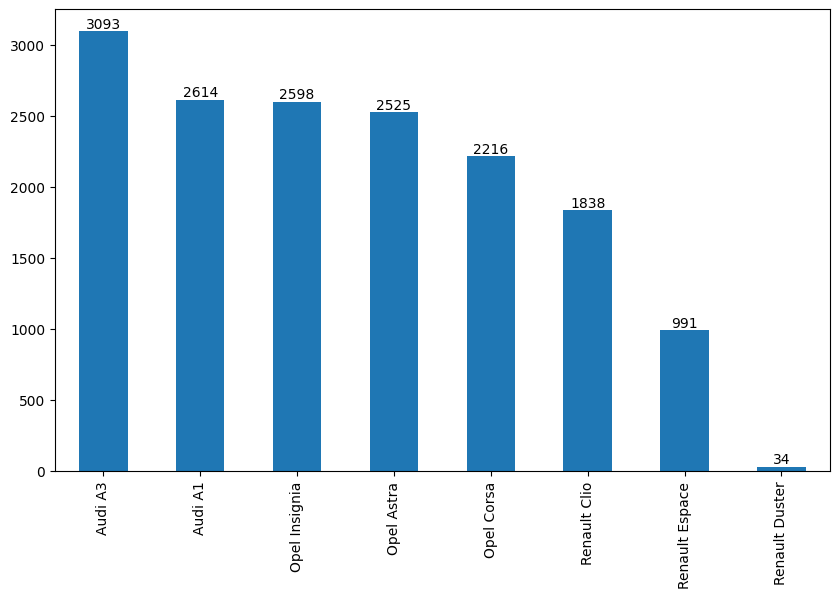

In [21]:
ax = df.make_model.value_counts().plot(kind ="bar")

ax.bar_label(ax.containers[0]);

# Axis object has a bar_label method to annotate the bar heights.
# Make sure that your matplotlib version is >= 3.4

In [22]:
df2 = df.copy()

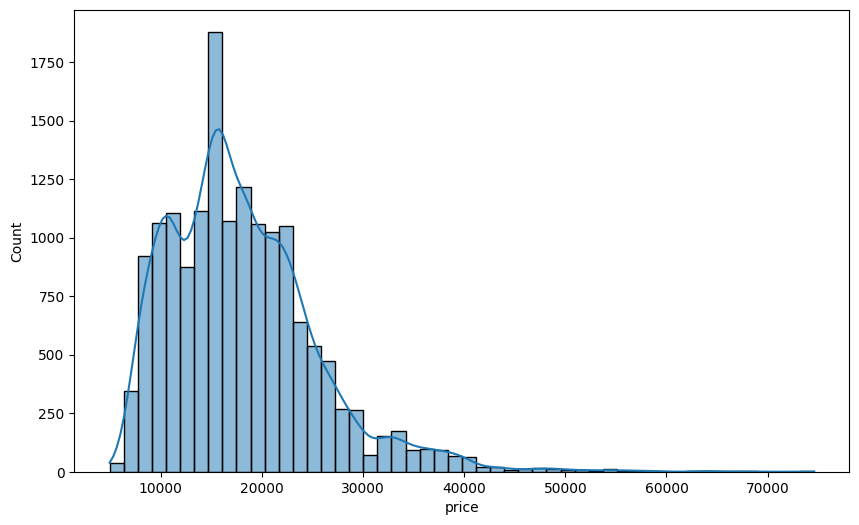

In [23]:
sns.histplot(df.price, bins=50, kde=True);

# We are checking the distribution of our target to see if we have any outliers, since linear
# models are highly susceptible to outliers. In the context of ML, outliers don't necessarily
# indicate an underlying problem in the data gathering process. It means that we don't have
# enough records that represent a certain area in the target which is called "underrepresented".
# And the model will most likely not learn enough about these underrepresented areas.

# In the histogram below, we can see that above 40k EUR, we dont have enough observation
# points to represent that longer right tail.

# Train one model without the outliers and train one with the outliers to see which one works better.

# It also might be a better idea to group the observations by their car make to check if they have outliers within their price ranges.

In [24]:
skew(df.price)

1.2368977644607202

In [25]:
df_numeric = df.select_dtypes(include="number")
df_numeric

# select_dtypes(include="number") to get only the numeric features.

,price,km,Extras,Gears,age,Previous_Owners,hp_kW,Inspection_new,Displacement_cc,Weight_kg,cons_comb,CO2_Emission
0,15770,56013.000000,3,7.0,3.0,2.0,66.0,1,1422.0,1220.0,3.8,99.0
1,14500,80000.000000,4,7.0,2.0,1.0,141.0,0,1798.0,1255.0,5.6,129.0
2,14640,83450.000000,2,7.0,3.0,1.0,85.0,0,1598.0,1135.0,3.8,99.0
3,14500,73000.000000,3,6.0,3.0,1.0,66.0,0,1422.0,1195.0,3.8,99.0
4,16790,16200.000000,4,7.0,3.0,1.0,66.0,1,1422.0,1135.0,4.1,109.0
...,...,...,...,...,...,...,...,...,...,...,...,...
15904,39950,1647.362609,2,6.0,0.0,1.0,147.0,0,1997.0,1758.0,5.3,139.0
15905,39885,9900.000000,3,7.0,0.0,1.0,165.0,0,1798.0,1708.0,7.4,168.0
15906,39875,15.000000,1,6.0,0.0,1.0,146.0,1,1997.0,1734.0,5.3,139.0
15907,39700,10.000000,2,6.0,0.0,1.0,147.0,0,1997.0,1758.0,5.3,139.0


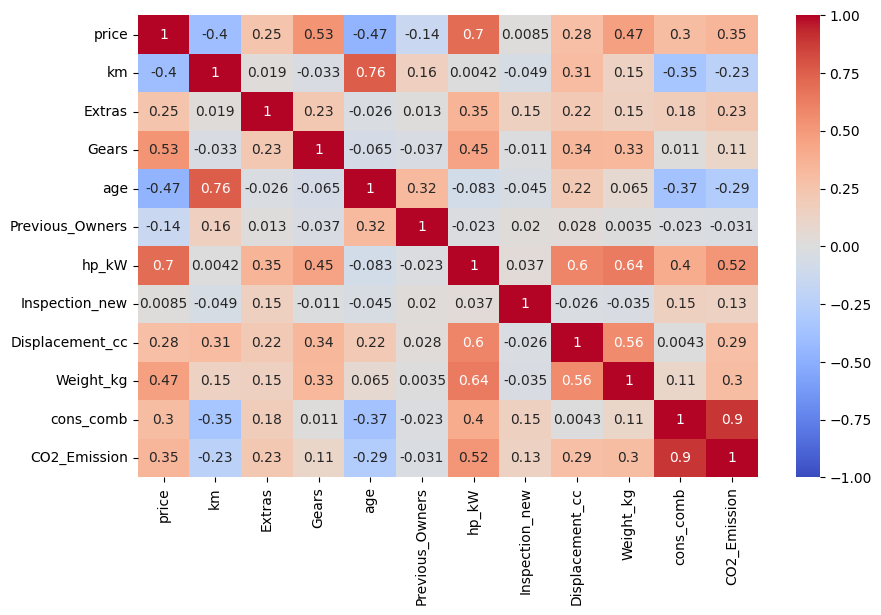

In [26]:
plt.figure(figsize=(10,6))
sns.heatmap(df_numeric.corr(), annot=True, vmin=-1, vmax=1, cmap='coolwarm');

## multicollinearity control

In [27]:
df_numeric.corr()[(df_numeric.corr()>= 0.9) & (df_numeric.corr() < 1)].any().any()

# Check if any 2 features have a correlation between 0.9 and 1 which indicates high positive correlation.

False

In [28]:
df_numeric.corr()[(df_numeric.corr()<= -0.9) & (df_numeric.corr() > -1)].any().any()

# Check if any 2 features have a correlation between -0.9 and -1 which indicates high negative correlation.

False

In [29]:
df_numeric.corr()[(abs(df_numeric.corr())>= 0.9) & (abs(df_numeric.corr()) < 1)].any().any()

# Combine them both into a one-liner.

False

## Outliers in Price Column

In [30]:
import warnings
warnings.filterwarnings('ignore')

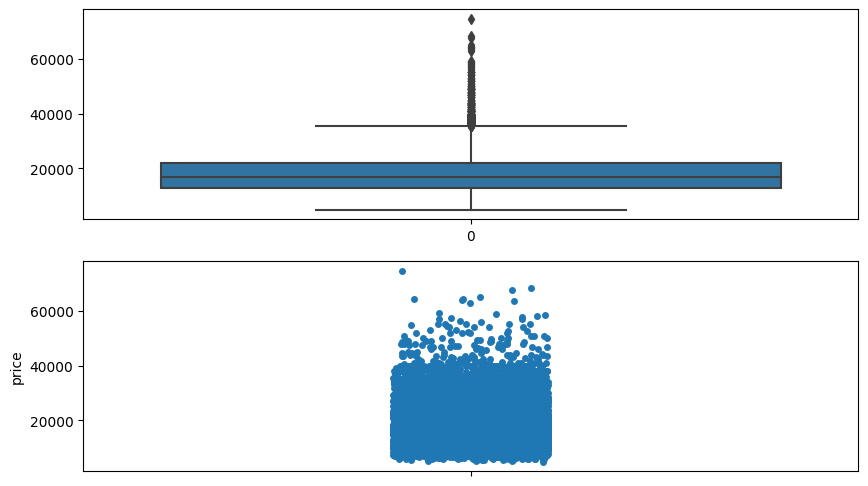

In [31]:
plt.figure(figsize=(10,6))

plt.subplot(211)
sns.boxplot(df.price)

plt.subplot(212)
sns.stripplot(df.price);

# Can check both boxplot and stripplot to see if we have any outliers and where they start from. If you have too many outliers (too long of a tail on either side), you can play
# with the whisker distance to accommodate some of the so-called outliers if you don't want to lose too many records.

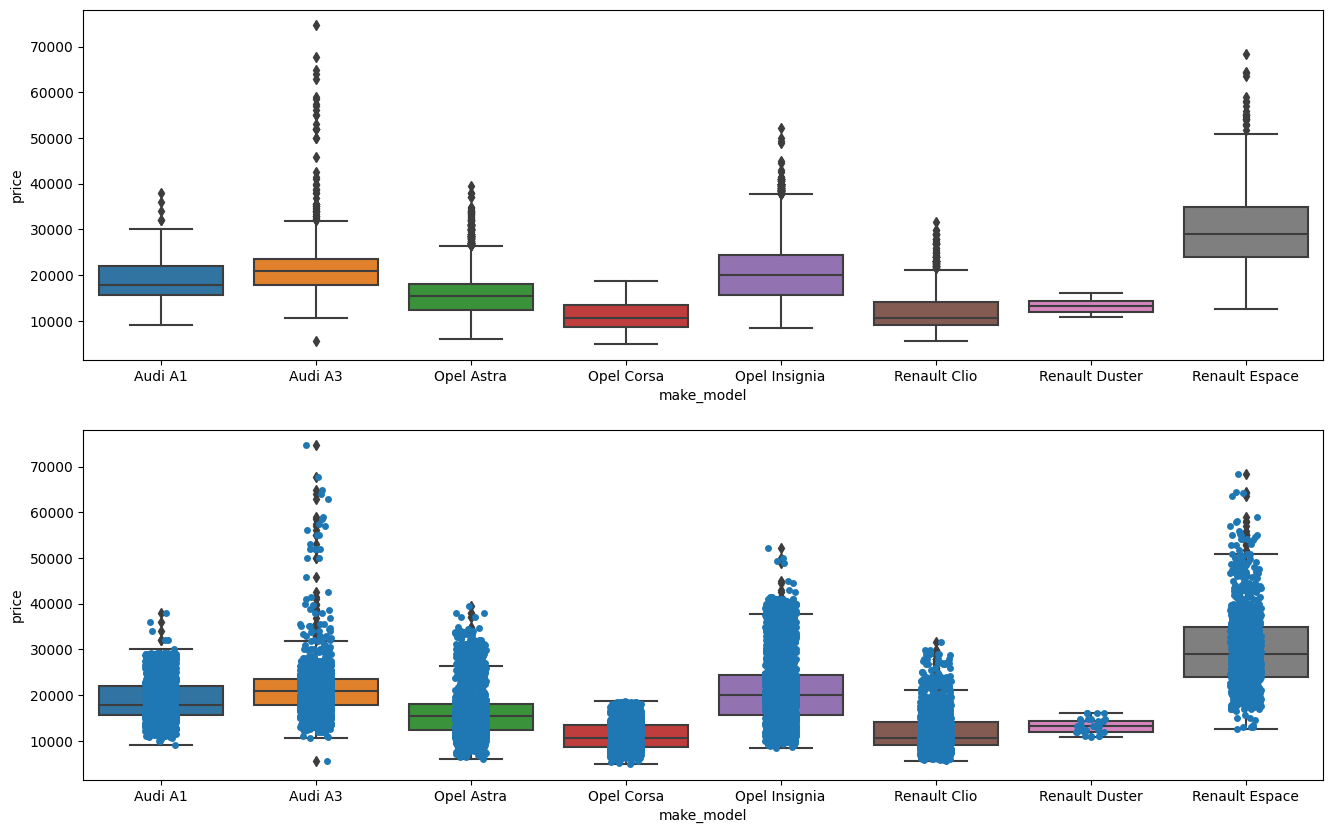

In [32]:
plt.figure(figsize=(16,10))
plt.subplot(211)
sns.boxplot(x="make_model", y="price", data=df, whis=1.5)

plt.subplot(212)
sns.boxplot(x="make_model", y="price", data=df, whis=1.5)
sns.stripplot(x="make_model", y="price", data=df);

# We can set individual whisker values per group, as they have different outlier situations. It's up to you.

In [33]:
df.make_model.unique()

# Unique valies in make_model

array(['Audi A1', 'Audi A3', 'Opel Astra', 'Opel Corsa', 'Opel Insignia',
       'Renault Clio', 'Renault Duster', 'Renault Espace'], dtype=object)

In [34]:
df[df["make_model"] == "Audi A1"]["price"]

# The price values for Audi A1 records.

0       15770
1       14500
2       14640
3       14500
4       16790
        ...  
2609    21800
2610    21789
2611    21750
2612    21760
2613    21750
Name: price, Length: 2614, dtype: int64

In [35]:
total_outliers = []

for model in df.make_model.unique():
    
    car_prices = df[df["make_model"] == model]["price"]
    
    Q1 = car_prices.quantile(0.25)
    Q3 = car_prices.quantile(0.75)
    IQR = Q3-Q1
    lower_lim = Q1 - 1.5 * IQR
    upper_lim = Q3 + 1.5 * IQR
    
    count_of_outliers = (car_prices[(car_prices < lower_lim) | (car_prices > upper_lim)]).count()
    
    total_outliers.append(count_of_outliers)
    
    print(f" The count of outlier for {model:<15} : {count_of_outliers:<5}, \
          The rate of outliers : {(count_of_outliers/len(df[df['make_model']== model])).round(3)}")
print()    
print("Total_outliers : ", sum(total_outliers), "The rate of total outliers :", (sum(total_outliers)/len(df)).round(3))


# Getting potential outliers per make_model based on a 1.5 whisker range.

 The count of outlier for Audi A1         : 5    ,           The rate of outliers : 0.002
 The count of outlier for Audi A3         : 51   ,           The rate of outliers : 0.016
 The count of outlier for Opel Astra      : 134  ,           The rate of outliers : 0.053
 The count of outlier for Opel Corsa      : 0    ,           The rate of outliers : 0.0
 The count of outlier for Opel Insignia   : 114  ,           The rate of outliers : 0.044
 The count of outlier for Renault Clio    : 90   ,           The rate of outliers : 0.049
 The count of outlier for Renault Duster  : 0    ,           The rate of outliers : 0.0
 The count of outlier for Renault Espace  : 22   ,           The rate of outliers : 0.022

Total_outliers :  416 The rate of total outliers : 0.026


## 2. Data Pre-Processing

As you know, the data set must be processed before proceeding to the implementation of the model. As the last step before model fitting, you need to split the data set into train and test. Then, you should train the model with the training data and evaluate the performance of the model on the test data. You can use the train and test data you have created for all algorithms.

You must also drop your target variable, the column you are trying to predict.

You can use many [performance metrics for regression](https://medium.com/analytics-vidhya/evaluation-metrics-for-regression-problems-343c4923d922) to measure the performance of the regression model you train. You can define a function to view different metric results together.

You can also use the [cross validation](https://towardsdatascience.com/cross-validation-explained-evaluating-estimator-performance-e51e5430ff85) method to measure the estimator performance. Cross validation uses different data samples from your test set and calculates the accuracy score for each data sample. You can calculate the final performance of your estimator by averaging these scores.

### Train | Test Split

In [36]:
X = df.drop(columns="price")
y = df.price

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

### OneHotEncoder

#### Example

In [38]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown="ignore", sparse=False)


# OneHotEncoder will encode your nominal categorical variables as binary dummy variables which is fundamentally important to avoid
# hinting the model that there is an underlying logical order to the nominal categories. We don't use get_dummies() function
# for this purpose because pandas functions are not well suited for scikit-learn methodology (creating different parts from the
# dataset such as train/test), since pandas was not made with machine learning in mind. It's a data analysis library.

# As always, we will fit the encoder on the train set, and transform both the train and test sets using what the encoder
# will have learnt from the train set. handle_unknown="ignore" is essential here, in case of a situation where
# your test set has a categorical value that was not seen by the encoder in the train set. It will handle
# this expception by "ignoring" it. The default value for this parameter is "error" which will raise an error.

In [39]:
train = {"train":['good','bad','worst','good', 'good', 'bad', 'bed']}
test = {"test": ['bad','worst','good', 'good', 'bad', "bed", "resume", "car"]}
train = pd.DataFrame(train)
test = pd.DataFrame(test)
train

,train
0,good
1,bad
2,worst
3,good
4,good
5,bad
6,bed


In [40]:
test

,test
0,bad
1,worst
2,good
3,good
4,bad
5,bed
6,resume
7,car


In [41]:
train.value_counts()

train
good     3
bad      2
bed      1
worst    1
dtype: int64

In [42]:
test.value_counts()

test  
bad       2
good      2
bed       1
car       1
resume    1
worst     1
dtype: int64

In [43]:
enc.fit_transform(train[["train"]])

# The fitting is done ONLY on the train set. As always.

array([[0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.]])

In [44]:
enc.transform(test[["test"]])


# And then we transform the test set with the unique values learnt from the train set.
# Notice here that the test set had 2 values that were not seen in the train set, yet the encoder
# handles this exception gracefully by "ignoring" those values (putting all 0 to those observation points).

array([[1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [45]:
enc.get_feature_names_out(["train"])

# OneHotEncoder will encode the nominal categorical variables as dummy variables, which will
# add the same new dummy/binary variables as the number of unique values in each categorical variable being encoded.
# And it will drop the original categorical variable afterwards. The newly added dummy feature names will follow
# the convention of <the name of the old categorical feature>_<name of the categorical value>

array(['train_bad', 'train_bed', 'train_good', 'train_worst'],
      dtype=object)

In [46]:
pd.DataFrame(enc.fit_transform(train[["train"]]), columns = enc.get_feature_names_out(["train"]))

,train_bad,train_bed,train_good,train_worst
0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0
3,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0
5,1.0,0.0,0.0,0.0
6,0.0,1.0,0.0,0.0


In [47]:
pd.DataFrame(enc.transform(test[["test"]]), columns = enc.get_feature_names_out(["train"]))

,train_bad,train_bed,train_good,train_worst
0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0
2,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0
5,0.0,1.0,0.0,0.0
6,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0


### OrdinalEncoder

#### Example

In [48]:
train2 = {"train":['good','bad','worst','good', 'good', 'bad']}
test2 = {"test": ['bad','worst','good', 'good', 'bad']}
train2 = pd.DataFrame(train2)
test2 = pd.DataFrame(test2)
train2

# If there's an underlying logical order to a categorical variable (which is called ordinal variable), we need to handle it
# accordingly by using OrdinalEncoder in order to avoid losing the logical order.

# There's an exception to this approach: In tree based models, we will encode all categorical variables with onehotencoder
# regardless of the difference between nominal and ordinal variables. We will talk about that more in the future.

,train
0,good
1,bad
2,worst
3,good
4,good
5,bad


In [49]:
test2

,test
0,bad
1,worst
2,good
3,good
4,bad


In [50]:
from sklearn.preprocessing import OrdinalEncoder

categories = ['worst','bad','good']

enc_2 = OrdinalEncoder(categories=[categories])

# If there's a logical order to the categorical values, we will use ordinalencoder. One important note here is that
# by default, ordinalencoder will order the categorical values in their alphabetical order. So, by default,
# it will encode bad:0, good:1, worst:2 which is not the correct logical order they should be.
# This is why we are specifying the categories variable in the exact logical order that they should be.

In [51]:
enc_2.fit_transform(train2[["train"]])

array([[2.],
       [1.],
       [0.],
       [2.],
       [2.],
       [1.]])

In [52]:
enc_2.transform(test2[["test"]])

array([[1.],
       [0.],
       [2.],
       [2.],
       [1.]])

In [53]:
enc_2.get_feature_names_out(["train"])

# OrdinalEncoder doesn't change the feature name. It just encodes the values of the feature.

AttributeError: 'OrdinalEncoder' object has no attribute 'get_feature_names_out'

### OneHotEncoder  and OrdinalEncoder for X_train

#### OneHotEncoder

In [54]:
for i in df.select_dtypes("object"):
    print(f"{i:<30}:", df[i].unique())

# First 8 features should be encoded with onehotencoder as they dont have logical orders.
# The last 3 features should be encoded with ordinalencoder as they have a logical order.

make_model                    : ['Audi A1' 'Audi A3' 'Opel Astra' 'Opel Corsa' 'Opel Insignia'
 'Renault Clio' 'Renault Duster' 'Renault Espace']
body_type                     : ['Sedans' 'Station wagon' 'Compact' 'Coupe' 'Van' 'Convertible' 'Off-Road'
 'Transporter']
Type                          : ['Used' "Employee's car" 'New' 'Demonstration' 'Pre-registered']
Fuel                          : ['Diesel' 'Benzine' 'LPG/CNG']
Paint_Type                    : ['Metallic' 'Uni/basic' 'Perl effect']
Upholstery_type               : ['Cloth' 'Part/Full Leather']
Gearing_Type                  : ['Automatic' 'Manual' 'Semi-automatic']
Drive_chain                   : ['front' '4WD' 'rear']
Comfort_Convenience_Package   : ['Premium' 'Standard' 'Premium Plus']
Entertainment_Media_Package   : ['Plus' 'Standard']
Safety_Security_Package       : ['Safety Premium Package' 'Safety Premium Plus Package'
 'Safety Standard Package']


In [55]:
cat = X_train.select_dtypes("object").columns
cat

# Names of the features that need to be encoded.

Index(['make_model', 'body_type', 'Type', 'Fuel', 'Paint_Type',
       'Upholstery_type', 'Gearing_Type', 'Drive_chain',
       'Comfort_Convenience_Package', 'Entertainment_Media_Package',
       'Safety_Security_Package'],
      dtype='object')

In [56]:
cat_onehot = ['make_model', 'body_type', 'Type', 'Fuel', 'Paint_Type','Upholstery_type', 'Gearing_Type', 'Drive_chain']
cat_ordinal = ['Comfort_Convenience_Package', 'Entertainment_Media_Package', 'Safety_Security_Package']

# Creating 2 separate lists. One for variables that will be onehotencoded, one for variables that will be ordinalencoded.

In [57]:
X_train[cat_onehot].head()

# X_train features that will be onehotencoded.

,make_model,body_type,Type,Fuel,Paint_Type,Upholstery_type,Gearing_Type,Drive_chain
15488,Renault Espace,Van,Used,Benzine,Metallic,Part/Full Leather,Automatic,front
13676,Renault Clio,Sedans,Used,Diesel,Metallic,Cloth,Manual,front
9325,Opel Corsa,Sedans,Employee's car,Benzine,Metallic,Cloth,Automatic,front
9968,Opel Corsa,Compact,New,Benzine,Metallic,Cloth,Automatic,front
7701,Opel Astra,Sedans,Used,Benzine,Metallic,Cloth,Automatic,front


In [58]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown="ignore", sparse=False)

enc.fit_transform(X_train[cat_onehot])

# Did the onehotencoder transformation to the relevant features of X_train

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [59]:
enc.get_feature_names_out(cat_onehot)

# These are the new feature names that we got after doing the OneHotEncoder

array(['make_model_Audi A1', 'make_model_Audi A3',
       'make_model_Opel Astra', 'make_model_Opel Corsa',
       'make_model_Opel Insignia', 'make_model_Renault Clio',
       'make_model_Renault Duster', 'make_model_Renault Espace',
       'body_type_Compact', 'body_type_Convertible', 'body_type_Coupe',
       'body_type_Off-Road', 'body_type_Sedans',
       'body_type_Station wagon', 'body_type_Transporter',
       'body_type_Van', 'Type_Demonstration', "Type_Employee's car",
       'Type_New', 'Type_Pre-registered', 'Type_Used', 'Fuel_Benzine',
       'Fuel_Diesel', 'Fuel_LPG/CNG', 'Paint_Type_Metallic',
       'Paint_Type_Perl effect', 'Paint_Type_Uni/basic',
       'Upholstery_type_Cloth', 'Upholstery_type_Part/Full Leather',
       'Gearing_Type_Automatic', 'Gearing_Type_Manual',
       'Gearing_Type_Semi-automatic', 'Drive_chain_4WD',
       'Drive_chain_front', 'Drive_chain_rear'], dtype=object)

In [60]:
X_train_onehot = pd.DataFrame(enc.fit_transform(X_train[cat_onehot]), index=X_train.index, 
                           columns=enc.get_feature_names_out(cat_onehot))
X_train_onehot

# Transformers in scikit-learn ALWAYS return np.ndarray objects. In order for us to use them as pandas objects, we have to
# turn them into dataframes. We can get the new names from the encoder itself directly by saying enc.get_feature_names_out(cat_onehot).
# Also, when we turn them into dataframes, we will lose the index information. We retrieve the original index information from the old X_train.
# This is very important to keep track of our records.

,make_model_Audi A1,make_model_Audi A3,make_model_Opel Astra,make_model_Opel Corsa,make_model_Opel Insignia,make_model_Renault Clio,make_model_Renault Duster,make_model_Renault Espace,body_type_Compact,body_type_Convertible,body_type_Coupe,body_type_Off-Road,body_type_Sedans,body_type_Station wagon,body_type_Transporter,body_type_Van,Type_Demonstration,Type_Employee's car,Type_New,Type_Pre-registered,Type_Used,Fuel_Benzine,Fuel_Diesel,Fuel_LPG/CNG,Paint_Type_Metallic,Paint_Type_Perl effect,Paint_Type_Uni/basic,Upholstery_type_Cloth,Upholstery_type_Part/Full Leather,Gearing_Type_Automatic,Gearing_Type_Manual,Gearing_Type_Semi-automatic,Drive_chain_4WD,Drive_chain_front,Drive_chain_rear
15488,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
13676,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
9325,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
9968,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
7701,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5695,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
8006,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1361,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1547,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


#### OrdinalEncoder

In [61]:
cat_ordinal = ['Comfort_Convenience_Package', 'Entertainment_Media_Package', 'Safety_Security_Package']

# Features to OrdinalEncode

In [62]:
for i in cat_ordinal:
    print(f"{i:<27}:", df[i].unique())

# Check their unique values

Comfort_Convenience_Package: ['Premium' 'Standard' 'Premium Plus']
Entertainment_Media_Package: ['Plus' 'Standard']
Safety_Security_Package    : ['Safety Premium Package' 'Safety Premium Plus Package'
 'Safety Standard Package']


In [63]:
from sklearn.preprocessing import OrdinalEncoder

cat_for_comfort = ['Standard', 'Premium', 'Premium Plus']
cat_for_ent = ['Standard', 'Plus']
cat_for_safety = ['Safety Standard Package', 'Safety Premium Package', 'Safety Premium Plus Package']

enc2 = OrdinalEncoder(categories=[cat_for_comfort, cat_for_ent, cat_for_safety])

# Manually arrange the unique category names in the correct logical order.

# Also, make sure that the order of the "categories" variable values are the same as the order
# of the columns that you want to OrdinalEncode like below:

In [64]:
X_train[cat_ordinal]

# Getting the features to OrdinalEncode

,Comfort_Convenience_Package,Entertainment_Media_Package,Safety_Security_Package
15488,Standard,Plus,Safety Premium Package
13676,Standard,Plus,Safety Premium Plus Package
9325,Premium,Plus,Safety Premium Package
9968,Premium,Plus,Safety Premium Package
7701,Standard,Plus,Safety Premium Package
...,...,...,...
5695,Premium,Plus,Safety Premium Package
8006,Standard,Standard,Safety Premium Package
1361,Standard,Standard,Safety Premium Plus Package
1547,Standard,Plus,Safety Premium Package


In [65]:
enc2.fit_transform(X_train[cat_ordinal])

array([[0., 1., 1.],
       [0., 1., 2.],
       [1., 1., 1.],
       ...,
       [0., 0., 2.],
       [0., 1., 1.],
       [0., 0., 1.]])

In [66]:
enc2.get_feature_names_out(cat_ordinal)

# Feature names are the same, as OrdinalEncoder doesn't change the feature names.

AttributeError: 'OrdinalEncoder' object has no attribute 'get_feature_names_out'

In [68]:
X_train_ordinal = pd.DataFrame(enc2.fit_transform(X_train[cat_ordinal]), index = X_train.index, 
                           columns = enc2.get_feature_names_out(cat_ordinal))

X_train_ordinal

# turn it back into a dataframe.

AttributeError: 'OrdinalEncoder' object has no attribute 'get_feature_names_out'

### Joining All Features of X_train

In [ ]:
X_train_numeric = X_train.select_dtypes("number")
X_train_numeric.head()

# We are getting the numerical features of our X_train which we did not encode in any way.
# We will combine all of them back into a one big dataframe (numeric_df + ordinal_df + onehot_df)

# Since we retained the original index values of our data points after we did OrdinalEncoder and OneHotEncoder, their indexes
# are the same now with the indexes of X_train_numeric, which makes it very easy to join them back together.

In [ ]:
X_train_new = X_train_numeric.join([X_train_onehot, X_train_ordinal])
X_train_new

# Joining back them together on the same index numbers.

### OneHotEncoder  and OrdinalEncoder for X_test

#### OneHotEncoder

In [ ]:
X_test_onehot = pd.DataFrame(enc.transform(X_test[cat_onehot]), index = X_test.index, 
                             columns = enc.get_feature_names_out(cat_onehot))
X_test_onehot

# We will do the same process on the test set as well. One important difference, though, is that
# we ONLY TRANSFORM the test set. NOT FIT it.

#### OrdinalEncoder

In [ ]:
X_test_ordinal = pd.DataFrame(enc2.transform(X_test[cat_ordinal]), index = X_test.index, 
                           columns = enc2.get_feature_names_out(cat_ordinal))

X_test_ordinal

### Joining All Features of X_test

In [ ]:
X_test_numeric = X_test.select_dtypes("number")
X_test_numeric.head()

In [ ]:
X_test_new = X_test_numeric.join([X_test_onehot, X_test_ordinal])
X_test_new

### Converting Object Features into Numerical Features Using Make Column Transformer

In [ ]:
cat_onehot = ['make_model', 'body_type', 'Type', 'Fuel', 'Paint_Type','Upholstery_type', 'Gearing_Type', 'Drive_chain']
cat_ordinal = ['Comfort_Convenience_Package', 'Entertainment_Media_Package', 'Safety_Security_Package']
    
cat_for_comfort = ['Standard', 'Premium', 'Premium Plus']
cat_for_ent = ['Standard', 'Plus']
cat_for_safety = ['Safety Standard Package', 'Safety Premium Package', 'Safety Premium Plus Package']

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

column_trans = make_column_transformer((OneHotEncoder(handle_unknown="ignore", sparse=False), cat_onehot), 
                                       (OrdinalEncoder(categories= [cat_for_comfort, cat_for_ent, cat_for_safety]), cat_ordinal),
                                       remainder='passthrough') # MinMaxScaler()


# As you can see, this process is actually extremely long and cumbersome. There's a saviour, though. 
# ColumnTransformer from scikit-learn was created exactly for this purpose. To automate all this long and tedious process.
# Because doing this process manually is very error prone. By automating it, things get much more reliable and consistent 
# and error proof.

# It will automate the processing of features in the order that is specified when we instantiate the calss.

# remainder="passthrough" allows us to passthrough the remainder of the columns that we are not doing anything with.
# The default value for remainder is "drop" which will drop all of the remainder columns.
# You can also do some other stuff with this parameter as well such as remainder=MinMaxScaler() which will
# scale the remaining columns. It in fact accepts any transformer that is implemented in scikit-learn.

In [ ]:
X_train.head()

In [ ]:
X_test.head()

In [ ]:
X_train.shape, X_test.shape

In [69]:
column_trans.fit_transform(X_train)

NameError: name 'column_trans' is not defined

In [ ]:
X_train_trans = column_trans.fit_transform(X_train)
X_test_trans = column_trans.transform(X_test)

In [ ]:
X_train_trans.shape, X_test_trans.shape

In [ ]:
X_train_trans

In [ ]:
column_trans.get_feature_names_out()

In [ ]:
features = column_trans.get_feature_names_out()

In [ ]:
X_train= pd.DataFrame(X_train_trans, columns=features, index=X_train.index)
X_train.head()

In [ ]:
X_test= pd.DataFrame(X_test_trans, columns=features, index=X_test.index)
X_test.head()

In [70]:
X_train.join(y_train).corr()

,km,Extras,Gears,age,Previous_Owners,hp_kW,Inspection_new,Displacement_cc,Weight_kg,cons_comb,CO2_Emission,price
km,1.000000,0.012696,-0.030614,0.758775,0.158394,0.000419,-0.057931,0.303317,0.149996,-0.346335,-0.230060,-0.400541
Extras,0.012696,1.000000,0.228371,-0.028479,0.012816,0.347680,0.151978,0.213602,0.144197,0.177832,0.226373,0.249109
Gears,-0.030614,0.228371,1.000000,-0.061611,-0.032704,0.451790,-0.011675,0.339450,0.332537,0.013744,0.108969,0.529704
age,0.758775,-0.028479,-0.061611,1.000000,0.317979,-0.082332,-0.050317,0.215643,0.068334,-0.373324,-0.290562,-0.472192
Previous_Owners,0.158394,0.012816,-0.032704,0.317979,1.000000,-0.021299,0.020921,0.029988,0.002601,-0.025561,-0.034947,-0.143518
hp_kW,0.000419,0.347680,0.451790,-0.082332,-0.021299,1.000000,0.036381,0.599064,0.636745,0.404256,0.523488,0.696816
Inspection_new,-0.057931,0.151978,-0.011675,-0.050317,0.020921,0.036381,1.000000,-0.025146,-0.039152,0.157671,0.135436,0.010907
Displacement_cc,0.303317,0.213602,0.339450,0.215643,0.029988,0.599064,-0.025146,1.000000,0.568093,0.006480,0.292285,0.282689
Weight_kg,0.149996,0.144197,0.332537,0.068334,0.002601,0.636745,-0.039152,0.568093,1.000000,0.101646,0.295589,0.466567
cons_comb,-0.346335,0.177832,0.013744,-0.373324,-0.025561,0.404256,0.157671,0.006480,0.101646,1.000000,0.895892,0.305411


In [71]:
corr_by_price = X_train.join(y_train).corr()["price"].sort_values()[:-1]
corr_by_price

# We want to check the correlation of all of my independent features with my target feature. This is why
# we are joining the target with the independent features here. We obviously know the correlation of 
# the feature with itself is 1 so we are excluding it with [:-1].

age               -0.472192
km                -0.400541
Previous_Owners   -0.143518
Inspection_new     0.010907
Extras             0.249109
Displacement_cc    0.282689
cons_comb          0.305411
CO2_Emission       0.351116
Weight_kg          0.466567
Gears              0.529704
hp_kW              0.696816
Name: price, dtype: float64

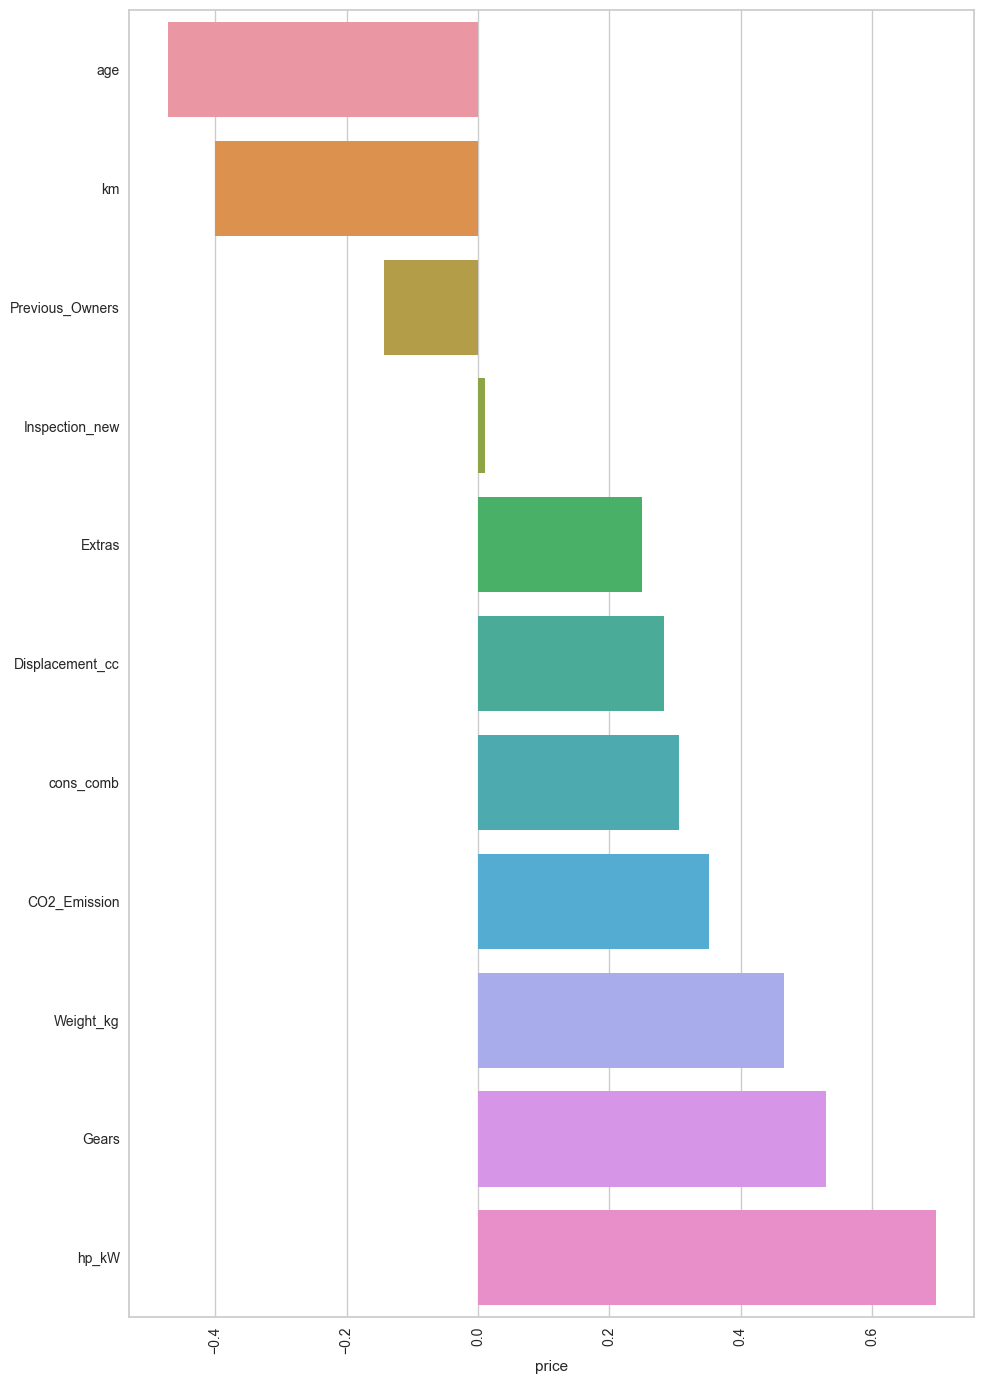

In [72]:
plt.figure(figsize = (10,14))
sns.barplot(y = corr_by_price.index, x = corr_by_price)
plt.xticks(rotation=90)
plt.tight_layout();

# Visualise the correlations to make it more readable.

### Scaling

In [73]:
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

ValueError: could not convert string to float: 'Renault Espace'

## Implement Linear Regression

 - Import the module
 - Fit the model 
 - Predict the test set
 - Determine feature coefficients
 - Evaluate model performance (use performance metrics for regression and cross_val_score)
 - Compare different evaluation metrics
 
*Note: You can use the [dir()](https://www.geeksforgeeks.org/python-dir-function/) function to see the methods you need.*

In [74]:
def train_val(model, X_train, y_train, X_test, y_test):
    
    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    
    scores = {"train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),                          
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    
    "test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
    
    return pd.DataFrame(scores)

# We will use this function to compare train and test metrics.

In [75]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train_scaled, y_train)

# Instantiate the linear model into an object and train it on the train set.

NameError: name 'X_train_scaled' is not defined

In [ ]:
pd.options.display.float_format = '{:.3f}'.format

# This way, pandas will show us 3 floating points.

In [ ]:
train_val(lm, X_train_scaled, y_train, X_test_scaled, y_test)

### Adjusted R2 Score

In [ ]:
def adj_r2(y_test, y_pred, X):
    r2 = r2_score(y_test, y_pred)
    n = X.shape[0]   # number of observations
    p = X.shape[1]   # number of independent variables 
    adj_r2 = 1 - (1-r2)*(n-1)/(n-p-1)
    return adj_r2

#There are too many featuras in our data but not enough rows, this is a false improvement in our model's R2_score.
#Especially in such data or if too many new features (such as dummies feature) have been added to our data.
#We need to detect real R2_score with adjusted R2_score.


# Adjusted R2_score checks the trade off between row and feature count and returns us a score. If numbers
#There will be serious decreases in adjusted_R2_score if there is a large imbalance between Above for Adjusted R2 Score
#We define the function.

In [ ]:
y_pred = lm.predict(X_test_scaled)

In [ ]:
adj_r2(y_test, y_pred, X)


### Cross Validate

In [ ]:
model = LinearRegression()
scores = cross_validate(model, X_train_scaled, y_train, scoring=['r2', 
            'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv =10,
             return_train_score=True)

# As we learned in our previous lessons, we get the overfiting control through cross validaition.
# We do this by comparing train and validation scores.

In [ ]:
pd.DataFrame(scores)

In [ ]:
pd.DataFrame(scores).iloc[:, 2:].mean()

# train ve validaiton scores close. So no Overfiting

In [ ]:
train_val(lm, X_train_scaled, y_train, X_test_scaled, y_test)

In [ ]:
2622/df.price.mean()

# models average error  %14.5

### Prediction Error with Outliers

In [ ]:
from yellowbrick.regressor import PredictionError
from yellowbrick.features import RadViz

visualizer = RadViz(size=(720, 3000))
model = LinearRegression()
visualizer = PredictionError(model)
visualizer.fit(X_train_scaled, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test_scaled, y_test)  # Evaluate the model on the test data
visualizer.show();

# With the prediciton error image, we can see how well the predictions made by our model are. When we look at it, we can see that the cars priced at 40 thousand EURO and above are pulling our best fit line down.
# If I have determined from the data on the basis of cars or models of 40 thousand EURO and above that I have seen spoil my scores.
# I can get better scores when I remove outlier priced cars from my data and retrain the model from this data.

# In this notebook, we will continue by removing the outlier values from our data. but not 40 thousand EURO cars

### Residual Plot with Outliers

NameError: name 'X_train_scaled' is not defined

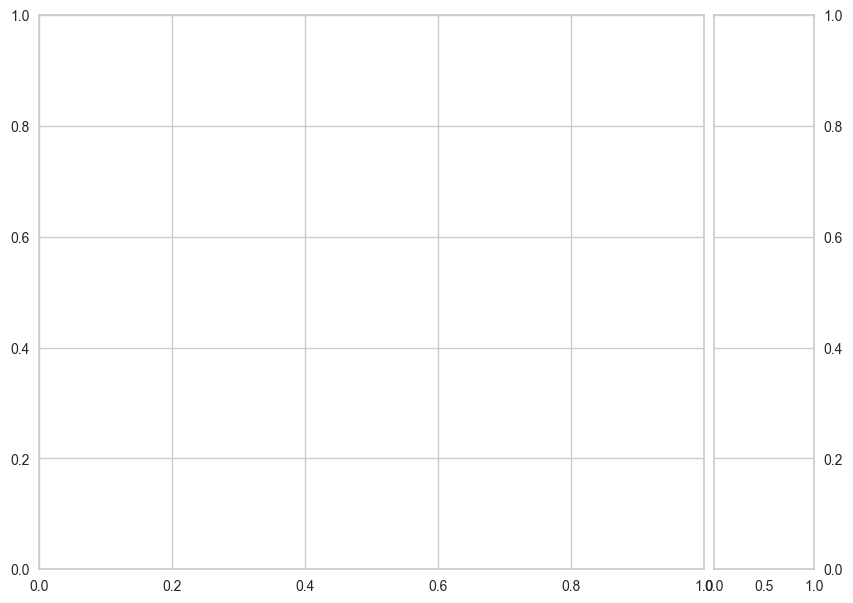

In [76]:
from yellowbrick.regressor import ResidualsPlot

visualizer = RadViz(size=(1000, 720))
model = LinearRegression()
visualizer = ResidualsPlot(model)

visualizer.fit(X_train_scaled, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test_scaled, y_test)  # Evaluate the model on the test data
visualizer.show();       

### Dropping outliers that worsen my predictions from the dataset

In [ ]:
for model in df2.make_model.unique():
    
    car_prices = df2[df2["make_model"]== model]["price"]
    
    Q1 = car_prices.quantile(0.25)
    Q3 = car_prices.quantile(0.75)
    
    IQR = Q3-Q1
    
    lower_lim = Q1-1.5*IQR
    upper_lim = Q3+1.5*IQR

    drop_index = df2[df2["make_model"]== model][(car_prices < lower_lim) | (car_prices > upper_lim)].index
    df2.drop(index = drop_index, inplace=True)
    df2.reset_index(drop=True, inplace=True)
df2

# Here we extract outlier observations from our data. First, determine the lower and upper limits and stay outside these limits.
# We determine the indexes of the remaining car prices and drop these indexes from our data.
# We use reset_index to ignore the indexes we drop and make the index order properly.

In [ ]:
15493 + 416

In [ ]:
df2.shape

In [ ]:
df3 = df2.copy()

# df3 is new dataset cleaned from outliers. I keep it maybe i can use it laters

In [ ]:
X = df2.drop(columns = "price")
y = df2.price

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)


In [ ]:
X_train= pd.DataFrame(column_trans.fit_transform(X_train), columns=features, index=X_train.index)
X_test= pd.DataFrame(column_trans.transform(X_test), columns=features, index=X_test.index)

In [ ]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
lm2 = LinearRegression()
lm2.fit(X_train_scaled, y_train)

### Prediction Error without Outliers

In [ ]:
visualizer = RadViz(size=(720, 3000))
model = LinearRegression()
visualizer = PredictionError(model)
visualizer.fit(X_train_scaled, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test_scaled, y_test)  # Evaluate the model on the test data
visualizer.show();

# After removing the outlier values, we see that the angle between the best fit line and the identity line narrows even more.

### Residual Plot without Outliers

In [ ]:
from yellowbrick.regressor import ResidualsPlot

visualizer = RadViz(size=(1000, 720))
model = LinearRegression()
visualizer = ResidualsPlot(model)

visualizer.fit(X_train_scaled, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test_scaled, y_test)  # Evaluate the model on the test data
visualizer.show(); 

In [ ]:
train_val(lm2, X_train_scaled, y_train, X_test_scaled, y_test)

# After the outliers are out, we can see that the results are getting better.

In [ ]:
2256/df2.price.mean()

# without outliers avreage prediction error decreased from %14.55 to %12,83

In [ ]:
2622/df.price.mean()

In [ ]:
model = LinearRegression() #normalize=True
scores = cross_validate(model, X_train_scaled, y_train,
                        scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], 
                        cv=10, return_train_score=True)

#overfitting check with new dataset

In [ ]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:,2:]

In [ ]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:,2:].mean()

# train and validation skoces close so no overfitting

In [ ]:
train_val(lm2, X_train_scaled, y_train, X_test_scaled, y_test)

# Since the test scores and the validation scores we got from the CV are close to each other, 
# We can say that the scores we got from the test (hold out) set are consistent scores.

In [ ]:
y_pred = lm2.predict(X_test_scaled)

lm_R2 = r2_score(y_test, y_pred)
lm_mae = mean_absolute_error(y_test, y_pred)
lm_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# To compare the scores we get from the linear model, we assign the scores to the variables.

In [ ]:
lm2.coef_  # oThe coefficients of the features with onehot encoder applied are very high. Dummy variable trap

# https://geoffruddock.com/one-hot-encoding-plus-linear-regression-equals-multi-collinearity/

In [ ]:
pd.DataFrame(lm2.coef_, index = X_train.columns, columns=["Coef"])

## Pipeline

In [77]:
df2

,make_model,body_type,price,km,Type,Fuel,Extras,Gears,age,Previous_Owners,hp_kW,Inspection_new,Paint_Type,Upholstery_type,Gearing_Type,Displacement_cc,Weight_kg,Drive_chain,cons_comb,CO2_Emission,Comfort_Convenience_Package,Entertainment_Media_Package,Safety_Security_Package
0,Audi A1,Sedans,15770,56013.000000,Used,Diesel,3,7.0,3.0,2.0,66.0,1,Metallic,Cloth,Automatic,1422.0,1220.0,front,3.8,99.0,Premium,Plus,Safety Premium Package
1,Audi A1,Sedans,14500,80000.000000,Used,Benzine,4,7.0,2.0,1.0,141.0,0,Metallic,Cloth,Automatic,1798.0,1255.0,front,5.6,129.0,Standard,Plus,Safety Premium Package
2,Audi A1,Sedans,14640,83450.000000,Used,Diesel,2,7.0,3.0,1.0,85.0,0,Metallic,Cloth,Automatic,1598.0,1135.0,front,3.8,99.0,Premium,Standard,Safety Premium Package
3,Audi A1,Sedans,14500,73000.000000,Used,Diesel,3,6.0,3.0,1.0,66.0,0,Metallic,Cloth,Automatic,1422.0,1195.0,front,3.8,99.0,Standard,Plus,Safety Premium Package
4,Audi A1,Sedans,16790,16200.000000,Used,Diesel,4,7.0,3.0,1.0,66.0,1,Metallic,Cloth,Automatic,1422.0,1135.0,front,4.1,109.0,Premium,Plus,Safety Premium Package
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15904,Renault Espace,Van,39950,1647.362609,New,Diesel,2,6.0,0.0,1.0,147.0,0,Metallic,Part/Full Leather,Automatic,1997.0,1758.0,front,5.3,139.0,Premium,Plus,Safety Premium Package
15905,Renault Espace,Van,39885,9900.000000,Used,Benzine,3,7.0,0.0,1.0,165.0,0,Metallic,Cloth,Automatic,1798.0,1708.0,front,7.4,168.0,Premium,Plus,Safety Premium Package
15906,Renault Espace,Van,39875,15.000000,Pre-registered,Diesel,1,6.0,0.0,1.0,146.0,1,Metallic,Part/Full Leather,Automatic,1997.0,1734.0,front,5.3,139.0,Standard,Plus,Safety Premium Package
15907,Renault Espace,Van,39700,10.000000,Pre-registered,Diesel,2,6.0,0.0,1.0,147.0,0,Metallic,Part/Full Leather,Automatic,1997.0,1758.0,front,5.3,139.0,Standard,Plus,Safety Premium Package


In [78]:
X = df2.drop(columns = ["price"])
y = df2.price

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

# After dropping outlier observations, we divide the remaining data into X and y again and divide it into train and test sets.

In [79]:
X_train.head()

,make_model,body_type,km,Type,Fuel,Extras,Gears,age,Previous_Owners,hp_kW,Inspection_new,Paint_Type,Upholstery_type,Gearing_Type,Displacement_cc,Weight_kg,Drive_chain,cons_comb,CO2_Emission,Comfort_Convenience_Package,Entertainment_Media_Package,Safety_Security_Package
15488,Renault Espace,Van,1510.000000,Used,Benzine,1,6.0,0.0,1.0,165.0,1,Metallic,Part/Full Leather,Automatic,1798.0,1734.0,front,6.8,153.0,Standard,Plus,Safety Premium Package
13676,Renault Clio,Sedans,89692.000000,Used,Diesel,3,5.0,3.0,1.0,55.0,0,Metallic,Cloth,Manual,1461.0,1165.0,front,3.3,85.0,Standard,Plus,Safety Premium Plus Package
9325,Opel Corsa,Sedans,9090.000000,Employee's car,Benzine,1,6.0,1.0,1.0,66.0,0,Metallic,Cloth,Automatic,1398.0,1199.0,front,5.9,137.0,Premium,Plus,Safety Premium Package
9968,Opel Corsa,Compact,1647.362609,New,Benzine,2,6.0,0.0,1.0,66.0,0,Metallic,Cloth,Automatic,1398.0,1163.0,front,5.9,136.0,Premium,Plus,Safety Premium Package
7701,Opel Astra,Sedans,1500.000000,Used,Benzine,1,6.0,0.0,1.0,112.0,0,Metallic,Cloth,Automatic,1399.0,1273.0,front,5.4,124.0,Standard,Plus,Safety Premium Package


In [80]:
cat_onehot = ['make_model', 'body_type', 'Type', 'Fuel', 'Paint_Type','Upholstery_type', 'Gearing_Type', 'Drive_chain']
cat_ordinal = ['Comfort_Convenience_Package', 'Entertainment_Media_Package', 'Safety_Security_Package']
    
cat_for_comfort = ['Standard', 'Premium', 'Premium Plus']
cat_for_ent = ['Standard', 'Plus']
cat_for_safety = ['Safety Standard Package', 'Safety Premium Package', 'Safety Premium Plus Package']

In [81]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

enc_onehot = OneHotEncoder(handle_unknown="ignore", sparse=False)
enc_ordinal = OrdinalEncoder(categories= [cat_for_comfort, cat_for_ent, cat_for_safety])

column_trans = make_column_transformer((enc_onehot, cat_onehot), 
                                       (enc_ordinal, cat_ordinal),
                                       remainder='passthrough') # MinMaxScaler()

#The make_column_transformer function automates transformations to featurs. 
# It transforms the featurs sequentially according to the order we will give into this function.

# (OneHotEncoder(handle_unknown="ignore", sparse=False), cat_onehot) 
# handle_unknown = "ignore" parameter transforms all the featurs in the cat_onehot list, 
# converting all categorical data that pass in the test set and not in the train set to 0.

# (OrdinalEncoder(categories=categories), cat_ordinal) 
#After the onehotencoder conversion to the relevant featurs, all the featurs in the cat_ordinal list 
# perform ordinal encoder conversion according to the hierarchical order of the unique categorical observations
# in the categories list.

# remainder='passthrough' means leave all other unconverted features as they are.

In [82]:
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline

operations = [("OneHot_Ordinal_Encoder", column_trans), ("scaler", MinMaxScaler()), ("Ridge", Ridge())]

ridge_pipe = Pipeline(steps=operations)

ridge_pipe.fit(X_train, y_train)

# pipe_model.fit(X,y) makes
# Since the first operation in pipe_model is column_trans;
# 1. Onehotencoder conversion is done to the features (cat_onehot) in the X data that will be transformed into onehotencoder.
# 2. The features (cat_ordinal) in the X data to which the ordinalencoder transformation will be applied are converted to ordinalencoder.
# 3. Except for the converted featurs, no action is taken on the remaining featurs, and they are left as they are.
# The second action in pipe_model is MinMaxScaler();
# 4. After the transformation, minmax scale is applied to the new numeric X that we obtained. 
# Since there are dummies consisting of 0 and 1 in our data, minmaxscaler was applied so that these observations 
# remain 0 and 1 again.
# The third action in pipe_model is Lasso();
# The training is completed by giving y Lasso to the model along with the transformed and scaled X.

Pipeline(steps=[('OneHot_Ordinal_Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['make_model', 'body_type',
                                                   'Type', 'Fuel', 'Paint_Type',
                                                   'Upholstery_type',
                                                   'Gearing_Type',
                                                   'Drive_chain']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Standard',
                                                                              'Premium',
                                                   

## Implement Ridge Regression

- Import the modul 
- Do not forget to scale the data or use Normalize parameter as True 
- Fit the model 
- Predict the test set 
- Evaluate model performance (use performance metrics for regression) 
- Tune alpha hiperparameter by using [cross validation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html) and determine the optimal alpha value.
- Fit the model and predict again with the new alpha value. 

## Ridge

In [83]:
from sklearn.linear_model import Ridge

In [84]:
operations = [("OneHot_Ordinal_Encoder", column_trans), ("scaler", MinMaxScaler()), ("Ridge", Ridge())]

ridge_model = Pipeline(steps=operations)

ridge_model.fit(X_train, y_train)

Pipeline(steps=[('OneHot_Ordinal_Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['make_model', 'body_type',
                                                   'Type', 'Fuel', 'Paint_Type',
                                                   'Upholstery_type',
                                                   'Gearing_Type',
                                                   'Drive_chain']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Standard',
                                                                              'Premium',
                                                   

In [85]:
train_val(ridge_model, X_train, y_train, X_test, y_test)

,train,test
R2,8.679391e-01,8.708815e-01
mae,1.853421e+03,1.855233e+03
mse,7.225730e+06,6.873987e+06
rmse,2.688072e+03,2.621829e+03


## Cross Validation

In [86]:
operations = [("OneHot_Ordinal_Encoder", column_trans), ("scaler", MinMaxScaler()), ("Ridge", Ridge())]
pipe_model = Pipeline(steps=operations)

scores = cross_validate(pipe_model, X_train, y_train,
                        scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], 
                        cv=10, return_train_score=True)

In [87]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:,2:].mean()

test_r2                              8.664626e-01
train_r2                             8.680124e-01
test_neg_mean_absolute_error        -1.861254e+03
train_neg_mean_absolute_error       -1.852983e+03
test_neg_mean_squared_error         -7.312763e+06
train_neg_mean_squared_error        -7.221795e+06
test_neg_root_mean_squared_error    -2.701828e+03
train_neg_root_mean_squared_error   -2.687310e+03
dtype: float64

## Finding best alpha for Ridge

In [88]:
from sklearn.model_selection import GridSearchCV

In [89]:
alpha_space = np.linspace(0.01, 100, 100)
alpha_space

array([1.000e-02, 1.020e+00, 2.030e+00, 3.040e+00, 4.050e+00, 5.060e+00,
       6.070e+00, 7.080e+00, 8.090e+00, 9.100e+00, 1.011e+01, 1.112e+01,
       1.213e+01, 1.314e+01, 1.415e+01, 1.516e+01, 1.617e+01, 1.718e+01,
       1.819e+01, 1.920e+01, 2.021e+01, 2.122e+01, 2.223e+01, 2.324e+01,
       2.425e+01, 2.526e+01, 2.627e+01, 2.728e+01, 2.829e+01, 2.930e+01,
       3.031e+01, 3.132e+01, 3.233e+01, 3.334e+01, 3.435e+01, 3.536e+01,
       3.637e+01, 3.738e+01, 3.839e+01, 3.940e+01, 4.041e+01, 4.142e+01,
       4.243e+01, 4.344e+01, 4.445e+01, 4.546e+01, 4.647e+01, 4.748e+01,
       4.849e+01, 4.950e+01, 5.051e+01, 5.152e+01, 5.253e+01, 5.354e+01,
       5.455e+01, 5.556e+01, 5.657e+01, 5.758e+01, 5.859e+01, 5.960e+01,
       6.061e+01, 6.162e+01, 6.263e+01, 6.364e+01, 6.465e+01, 6.566e+01,
       6.667e+01, 6.768e+01, 6.869e+01, 6.970e+01, 7.071e+01, 7.172e+01,
       7.273e+01, 7.374e+01, 7.475e+01, 7.576e+01, 7.677e+01, 7.778e+01,
       7.879e+01, 7.980e+01, 8.081e+01, 8.182e+01, 

In [90]:
operations = [("OneHot_Ordinal_Encoder", column_trans), ("scaler", MinMaxScaler()), ("Ridge", Ridge())]
pipe_model = Pipeline(steps=operations)

param_grid = {'Ridge__alpha':alpha_space}  # Parameter names should be used with the model name defined in the pipeline.

ridge_grid_model = GridSearchCV(estimator=pipe_model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=10,
                          n_jobs = -1,
                          return_train_score=True)

In [91]:
pipe_model.get_params()  #To see the parameters of the model defined with the pipeline

{'memory': None,
 'steps': [('OneHot_Ordinal_Encoder',
   ColumnTransformer(remainder='passthrough',
                     transformers=[('onehotencoder',
                                    OneHotEncoder(handle_unknown='ignore',
                                                  sparse=False),
                                    ['make_model', 'body_type', 'Type', 'Fuel',
                                     'Paint_Type', 'Upholstery_type',
                                     'Gearing_Type', 'Drive_chain']),
                                   ('ordinalencoder',
                                    OrdinalEncoder(categories=[['Standard',
                                                                'Premium',
                                                                'Premium Plus'],
                                                               ['Standard',
                                                                'Plus'],
                                                   

In [92]:
ridge_grid_model.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('OneHot_Ordinal_Encoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         ['make_model',
                                                                          'body_type',
                                                                          'Type',
                                                                          'Fuel',
                                                                          'Paint_Type',
                                                                          'Upholstery_type',
       

In [93]:
ridge_grid_model.best_estimator_


Pipeline(steps=[('OneHot_Ordinal_Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['make_model', 'body_type',
                                                   'Type', 'Fuel', 'Paint_Type',
                                                   'Upholstery_type',
                                                   'Gearing_Type',
                                                   'Drive_chain']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Standard',
                                                                              'Premium',
                                                   

In [94]:
ridge_grid_model.best_params_

{'Ridge__alpha': 0.01}

In [95]:
pd.DataFrame(ridge_grid_model.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_Ridge__alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.145002,0.014996,0.022997,0.010048,0.01,{'Ridge__alpha': 0.01},-2724.837731,-2760.155942,-2672.490300,-2802.607204,-2935.634348,-2610.505063,-2505.166886,-2719.295673,-2637.299891,-2649.934821,-2701.792786,111.261634,1,-2684.519392,-2679.982251,-2690.066531,-2674.773420,-2659.836582,-2696.330003,-2707.752161,-2684.633028,-2694.160891,-2693.919719,-2686.597398,12.541890
1,0.137005,0.014178,0.021995,0.005999,1.02,{'Ridge__alpha': 1.02},-2723.994536,-2762.287725,-2675.940350,-2802.601776,-2941.129769,-2610.018078,-2501.853445,-2722.384606,-2633.853873,-2644.358903,-2701.842306,113.579149,2,-2685.267188,-2680.737073,-2690.797185,-2675.487196,-2660.580104,-2697.077831,-2708.477018,-2685.340837,-2694.877796,-2694.727241,-2687.336947,12.543578
2,0.142100,0.013301,0.025997,0.006634,2.03,{'Ridge__alpha': 2.03},-2724.099948,-2765.673834,-2680.193544,-2803.443667,-2947.416689,-2610.765965,-2499.809089,-2726.598868,-2631.406643,-2641.655213,-2703.106346,115.741543,3,-2687.068164,-2682.549236,-2692.554694,-2677.239516,-2662.371272,-2698.883886,-2710.268816,-2687.071213,-2696.628745,-2696.652557,-2689.128810,12.552871
3,0.144672,0.014974,0.020997,0.003000,3.04,{'Ridge__alpha': 3.04},-2724.809283,-2769.787492,-2684.863346,-2804.856268,-2954.121688,-2612.301267,-2498.724557,-2731.451907,-2629.716007,-2640.795063,-2705.142688,117.754095,4,-2689.531388,-2685.020053,-2694.956281,-2679.665128,-2664.816246,-2701.354284,-2712.762677,-2689.456484,-2699.043884,-2699.260658,-2691.586708,12.571178
4,0.139000,0.011357,0.019996,0.007742,4.05,{'Ridge__alpha': 4.05},-2725.919670,-2774.337976,-2689.745697,-2806.661215,-2961.028072,-2614.349699,-2498.363020,-2736.664327,-2628.603498,-2641.175319,-2707.684849,119.632912,5,-2692.424494,-2687.914155,-2697.774941,-2682.534407,-2667.679537,-2704.252727,-2715.724427,-2692.268265,-2701.893530,-2702.298821,-2694.476530,12.597508
5,0.134423,0.010669,0.021001,0.008307,5.06,{'Ridge__alpha': 5.06},-2727.301036,-2779.148739,-2694.721125,-2808.736820,-2968.002593,-2616.734150,-2498.546375,-2742.065405,-2627.936236,-2642.414337,-2710.560682,121.394852,6,-2695.597885,-2691.080868,-2700.864554,-2685.695384,-2670.810115,-2707.427376,-2718.996369,-2695.357259,-2705.026552,-2705.607908,-2697.646427,12.630334
6,0.139518,0.009725,0.021943,0.007965,6.07,{'Ridge__alpha': 6.07},-2728.866380,-2784.106438,-2699.715891,-2810.997689,-2974.961209,-2619.336608,-2499.141012,-2747.547047,-2627.614612,-2644.258594,-2713.654548,123.054994,7,-2698.951123,-2694.419479,-2704.126988,-2689.044509,-2674.107365,-2710.776833,-2722.469356,-2698.622827,-2708.340345,-2709.083198,-2700.994202,12.668133
7,0.157004,0.031954,0.015999,0.004894,7.08,{'Ridge__alpha': 7.08},-2730.556010,-2789.135795,-2704.683316,-2813.382872,-2981.850514,-2622.076751,-2500.046374,-2753.039449,-2627.563379,-2646.533811,-2716.886827,124.626200,8,-2702.415057,-2697.860935,-2707.494676,-2692.509898,-2677.502689,-2714.231738,-2726.066528,-2701.995737,-2711.763899,-2712.653931,-2704.449509,12.709556
8,0.139006,0.015134,0.017994,0.003998,8.09,{'Ridge__alpha': 8.09},-2732.328266,-2794.185752,-2709.593642,-2815.848373,-2988.636810,-2624.899090,-2501.186375,-2758.497163,-2627.725215,-2649.117063,-2720.201775,126.119264,9,-2705.941302,-2701.357124,-2710.920363,-2696.041018,-2680.948615,-2717.743888,-2729.733162,-2705.427709,-2715.247457,-2716.271487,-2707.963213,12.753467
9,0.130999,0.012207,0.019000,0.003000,9.1,{'Ridge__alpha': 9.1},-2734.153708,-2799.221265,

In [96]:
ridge_grid_model.best_index_

0

In [97]:
pd.DataFrame(ridge_grid_model.cv_results_).loc[1, ["mean_test_score", "mean_train_score"]]

mean_test_score    -2701.842306
mean_train_score   -2687.336947
Name: 1, dtype: object

In [98]:
ridge_grid_model.best_score_

-2701.7927859068363

In [99]:
train_val(ridge_grid_model, X_train, y_train, X_test, y_test)

,train,test
R2,8.679972e-01,8.709275e-01
mae,1.854920e+03,1.856542e+03
mse,7.222552e+06,6.871541e+06
rmse,2.687481e+03,2.621362e+03


In [100]:
y_pred = ridge_grid_model.predict(X_test)
rm_R2 = r2_score(y_test, y_pred)
rm_mae = mean_absolute_error(y_test, y_pred)
rm_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

In [101]:
operations = [("OneHot_Ordinal_Encoder", column_trans), ("scaler", MinMaxScaler()), ("Ridge", Ridge(alpha=1.02))]

ridge_model = Pipeline(steps=operations)

ridge_model.fit(X_train, y_train)

Pipeline(steps=[('OneHot_Ordinal_Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['make_model', 'body_type',
                                                   'Type', 'Fuel', 'Paint_Type',
                                                   'Upholstery_type',
                                                   'Gearing_Type',
                                                   'Drive_chain']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Standard',
                                                                              'Premium',
                                                   

In [102]:
ridge_model["Ridge"].coef_  # In order to get the coefficients, the model name you know through the model 
                            # created with the pipeline should be used as a key.

array([  2460.17852306,   3600.09001395,  -1525.72674425,  -2929.06724112,
         1504.71981278,  -3076.97812293,  -6437.65128846,   6404.43504707,
         -123.58462188,    771.35653288,   -638.35365509,   -208.64294423,
          -96.40769846,     51.9276037 ,  -1317.00551656,   1560.71029967,
         2401.77722314,  -1424.5718508 ,    839.64441948,   -736.5387344 ,
        -1080.31105745,   -569.32113548,    426.87057863,    142.45055686,
         -842.88364709,   1488.94063342,   -646.05698634,   -434.77880555,
          434.77880555,   -361.06448085,  -1945.86475418,   2306.92923508,
         2263.23423713,   -430.62239582,  -1832.61184132,   1047.27287601,
          -86.44027499,    163.38893751, -10291.50165819,    509.85349329,
         1599.57183279,  -5334.31200869,    358.63110082,  25408.00389138,
         -240.73394542,   -747.14827092,  -1599.84201882,   3898.82170909,
        -5933.79834528])

In [103]:
ridge_model["OneHot_Ordinal_Encoder"].get_feature_names_out()

AttributeError: Transformer ordinalencoder (type OrdinalEncoder) does not provide get_feature_names_out.

In [104]:
pd.DataFrame(ridge_model["Ridge"].coef_, index = ridge_model["OneHot_Ordinal_Encoder"].get_feature_names_out(), columns=["Coef"]).sort_values("Coef")

AttributeError: Transformer ordinalencoder (type OrdinalEncoder) does not provide get_feature_names_out.

## 5. Implement Lasso Regression

- Import the modul 
- Do not forget to scale the data or use Normalize parameter as True(If needed)
- Fit the model 
- Predict the test set 
- Evaluate model performance (use performance metrics for regression) 
- Tune alpha hyperparameter by using [cross validation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html) and determine the optimal alpha value.
- Fit the model and predict again with the new alpha value.
- Compare different evaluation metrics

*Note: To understand the importance of the alpha hyperparameter, you can observe the effects of different alpha values on feature coefficants.*

In [105]:
from sklearn.linear_model import Lasso

In [106]:
operations = [("OneHot_Ordinal_Encoder", column_trans), ("scaler", MinMaxScaler()), ("Lasso", Lasso())]

lasso_model = Pipeline(steps=operations)

lasso_model.fit(X_train, y_train)

Pipeline(steps=[('OneHot_Ordinal_Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['make_model', 'body_type',
                                                   'Type', 'Fuel', 'Paint_Type',
                                                   'Upholstery_type',
                                                   'Gearing_Type',
                                                   'Drive_chain']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Standard',
                                                                              'Premium',
                                                   

In [107]:
train_val(lasso_model, X_train, y_train, X_test, y_test)

,train,test
R2,8.678156e-01,8.708457e-01
mae,1.855027e+03,1.854780e+03
mse,7.232485e+06,6.875895e+06
rmse,2.689328e+03,2.622193e+03


## Cross Validation

In [108]:
operations = [("OneHot_Ordinal_Encoder", column_trans), ("scaler", MinMaxScaler()), ("Lasso", Lasso())]

model = Pipeline(steps=operations)
scores = cross_validate(model, X_train, y_train,
                        scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'],
                        cv=10, return_train_score=True)

In [109]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:,2:].mean()

test_r2                              8.665195e-01
train_r2                             8.679032e-01
test_neg_mean_absolute_error        -1.862177e+03
train_neg_mean_absolute_error       -1.854615e+03
test_neg_mean_squared_error         -7.309160e+06
train_neg_mean_squared_error        -7.227769e+06
test_neg_root_mean_squared_error    -2.701214e+03
train_neg_root_mean_squared_error   -2.688422e+03
dtype: float64

## Finding best alpha for Lasso

In [110]:
operations = [("OneHot_Ordinal_Encoder", column_trans), ("scaler", MinMaxScaler()), ("Lasso", Lasso())]

model = Pipeline(steps=operations)

param_grid = {'Lasso__alpha':alpha_space}  # Parameter names should be used with the model name defined in the pipeline.

lasso_grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=10,
                          n_jobs = -1,
                          return_train_score=True)

In [111]:
lasso_grid_model.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('OneHot_Ordinal_Encoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         ['make_model',
                                                                          'body_type',
                                                                          'Type',
                                                                          'Fuel',
                                                                          'Paint_Type',
                                                                          'Upholstery_type',
       

In [112]:
lasso_grid_model.best_params_

{'Lasso__alpha': 1.02}

In [113]:
pd.DataFrame(lasso_grid_model.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_Lasso__alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,3.616555,0.180503,0.023414,0.008126,0.01,{'Lasso__alpha': 0.01},-2724.917974,-2760.126948,-2672.423601,-2802.606850,-2935.631687,-2610.472513,-2505.230952,-2719.262299,-2637.305538,-2649.838026,-2701.781639,111.257960,2,-2684.519596,-2679.982466,-2690.066729,-2674.773587,-2659.836789,-2696.330205,-2707.752304,-2684.633223,-2694.161096,-2693.919926,-2686.597592,12.541882
1,0.798584,0.093481,0.032175,0.012472,1.02,{'Lasso__alpha': 1.02},-2722.986018,-2762.012649,-2673.113184,-2803.512186,-2939.046861,-2608.957769,-2508.540021,-2719.318067,-2638.839370,-2636.014673,-2701.234080,112.291280,1,-2686.246314,-2681.946175,-2691.916296,-2676.600620,-2661.645258,-2698.287358,-2709.463216,-2686.417896,-2696.204098,-2696.079108,-2688.480634,12.565235
2,0.412819,0.023192,0.025597,0.008376,2.03,{'Lasso__alpha': 2.03},-2723.719384,-2767.698926,-2678.974883,-2806.459898,-2944.240252,-2610.564160,-2513.057751,-2722.126194,-2644.768877,-2626.531482,-2703.814181,113.275409,3,-2690.636147,-2686.290711,-2696.147022,-2680.669360,-2665.923122,-2702.467603,-2713.303986,-2690.338188,-2700.530131,-2701.466909,-2692.777318,12.580049
3,0.306154,0.019598,0.026999,0.012691,3.04,{'Lasso__alpha': 3.04},-2726.495483,-2774.088114,-2685.277985,-2809.536457,-2950.749190,-2612.656227,-2514.252522,-2727.539386,-2644.632291,-2629.651196,-2707.487885,114.727730,4,-2695.757203,-2691.075110,-2701.048620,-2685.342133,-2671.059390,-2707.513518,-2717.395723,-2696.224351,-2703.946753,-2707.674343,-2697.703714,12.434747
4,0.267003,0.017918,0.024998,0.006709,4.05,{'Lasso__alpha': 4.05},-2728.052576,-2780.825126,-2689.736424,-2810.222820,-2956.786337,-2614.695988,-2513.017145,-2733.338793,-2645.373549,-2636.717439,-2710.876620,116.047336,5,-2699.424285,-2695.228527,-2704.325333,-2688.736990,-2674.745353,-2711.300040,-2720.922109,-2700.195330,-2707.978137,-2711.238472,-2701.409458,12.417775
5,0.242002,0.023578,0.024997,0.006713,5.06,{'Lasso__alpha': 5.06},-2729.877295,-2787.738448,-2693.153630,-2810.022912,-2962.642810,-2615.705515,-2511.517717,-2737.085153,-2645.482350,-2642.205391,-2713.543122,117.562118,6,-2703.216529,-2698.437684,-2707.177225,-2691.689539,-2678.012332,-2714.060959,-2724.017993,-2702.770110,-2710.775457,-2713.967447,-2704.412527,12.310828
6,0.220002,0.015493,0.023999,0.006632,6.07,{'Lasso__alpha': 6.07},-2733.127032,-2795.163218,-2696.546437,-2809.858581,-2968.762892,-2616.494409,-2510.341438,-2740.318326,-2645.501957,-2647.202193,-2716.331648,119.217157,7,-2706.315535,-2701.712529,-2710.071578,-2694.739388,-2681.167137,-2716.987989,-2727.112052,-2705.461259,-2713.580321,-2716.751065,-2707.389885,12.243390
7,0.227110,0.026646,0.021478,0.008968,7.08,{'Lasso__alpha': 7.08},-2736.508156,-2802.692292,-2699.904541,-2809.893059,-2975.009720,-2617.799338,-2509.664337,-2743.888654,-2645.527682,-2652.806029,-2719.369381,120.805213,8,-2709.313360,-2704.932814,-2712.940384,-2697.977724,-2684.250359,-2720.156129,-2730.285607,-2708.416997,-2716.378731,-2719.793981,-2710.444609,12.223604
8,0.206134,0.016211,0.017997,0.003998,8.09,{'Lasso__alpha': 8.09},-2740.323691,-2811.209374,-2703.619601,-2810.457632,-2981.854100,-2619.573089,-2509.354263,-2747.897080,-2645.970686,-2659.060642,-2722.932016,122.512893,9,-2712.697815,-2708.580134,-2716.245852,-2701.278470,-2687.802567,-2723.460725,-2733.475224,-2711.763250,-2719.601845,-2723.286485,-2713.819237,12.146369
9,0.185004,0.006711,0.021995,0.007484,9.1,{'Lasso__alpha': 9.1},-2744.581250,-2820.644413,

In [114]:
lasso_grid_model.best_index_

1

In [115]:
pd.DataFrame(lasso_grid_model.cv_results_).loc[1, ["mean_test_score", "mean_train_score"]]

mean_test_score     -2701.23408
mean_train_score   -2688.480634
Name: 1, dtype: object

In [116]:
lasso_grid_model.best_score_

-2701.23407979063

In [117]:
train_val(lasso_grid_model, X_train, y_train, X_test, y_test)

,train,test
R2,8.678101e-01,8.708398e-01
mae,1.855034e+03,1.854765e+03
mse,7.232791e+06,6.876207e+06
rmse,2.689385e+03,2.622252e+03


In [118]:
y_pred = lasso_grid_model.predict(X_test)
lasm_R2 = r2_score(y_test, y_pred)
lasm_mae = mean_absolute_error(y_test, y_pred)
lasm_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

In [119]:
operations = [("OneHot_Ordinal_Encoder", column_trans), ("scaler", MinMaxScaler()), ("Lasso", Lasso(alpha=1.02))]

lasso_model = Pipeline(steps=operations)

lasso_model.fit(X_train, y_train)

Pipeline(steps=[('OneHot_Ordinal_Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['make_model', 'body_type',
                                                   'Type', 'Fuel', 'Paint_Type',
                                                   'Upholstery_type',
                                                   'Gearing_Type',
                                                   'Drive_chain']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Standard',
                                                                              'Premium',
                                                   

In [120]:
pd.DataFrame(lasso_model["Lasso"].coef_, index = lasso_model["OneHot_Ordinal_Encoder"].get_feature_names_out(), columns=["Coef"]).sort_values("Coef")

AttributeError: Transformer ordinalencoder (type OrdinalEncoder) does not provide get_feature_names_out.

## 6. Implement Elastic-Net

- Import the modul 
- Do not forget to scale the data or use Normalize parameter as True(If needed)
- Fit the model 
- Predict the test set 
- Evaluate model performance (use performance metrics for regression) 
- Tune alpha hyperparameter by using [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) and determine the optimal alpha value.
- Fit the model and predict again with the new alpha value.
- Compare different evaluation metrics

In [121]:
from sklearn.linear_model import ElasticNet

In [122]:
operations = [("OneHot_Ordinal_Encoder", column_trans), ("scaler", MinMaxScaler()), ("ElasticNet", ElasticNet())]

elastic_model = Pipeline(steps=operations)

elastic_model.fit(X_train, y_train)

Pipeline(steps=[('OneHot_Ordinal_Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['make_model', 'body_type',
                                                   'Type', 'Fuel', 'Paint_Type',
                                                   'Upholstery_type',
                                                   'Gearing_Type',
                                                   'Drive_chain']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Standard',
                                                                              'Premium',
                                                   

In [123]:
train_val(elastic_model, X_train, y_train, X_test, y_test)

,train,test
R2,4.946496e-01,4.940801e-01
mae,3.872594e+03,3.848618e+03
mse,2.765031e+07,2.693407e+07
rmse,5.258357e+03,5.189805e+03


## Cross Validation

In [124]:
operations = [("OneHot_Ordinal_Encoder", column_trans), ("scaler", MinMaxScaler()), ("ElasticNet", ElasticNet())]

model = Pipeline(steps=operations)

scores = cross_validate(model, X_train, y_train,
                        scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], 
                        cv=10, return_train_score=True)

In [125]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:,2:].mean()

test_r2                              4.949631e-01
train_r2                             4.950044e-01
test_neg_mean_absolute_error        -3.873410e+03
train_neg_mean_absolute_error       -3.871334e+03
test_neg_mean_squared_error         -2.766524e+07
train_neg_mean_squared_error        -2.763094e+07
test_neg_root_mean_squared_error    -5.255422e+03
train_neg_root_mean_squared_error   -5.256481e+03
dtype: float64

## Finding best alpha and l1_ratio for ElasticNet

In [126]:
operations = [("OneHot_Ordinal_Encoder", column_trans), ("scaler", MinMaxScaler()), ("ElasticNet", ElasticNet())]

model = Pipeline(steps=operations)

param_grid = {'ElasticNet__alpha':[1.02, 2,  3, 4, 5, 7, 10, 11],
              'ElasticNet__l1_ratio':[.5, .7, .9, .95, .99, 1]}

elastic_grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=10,
                          n_jobs = -1,
                          return_train_score=True)

In [127]:
elastic_grid_model.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('OneHot_Ordinal_Encoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         ['make_model',
                                                                          'body_type',
                                                                          'Type',
                                                                          'Fuel',
                                                                          'Paint_Type',
                                                                          'Upholstery_type',
       

In [128]:
elastic_grid_model.best_params_

{'ElasticNet__alpha': 1.02, 'ElasticNet__l1_ratio': 1}

In [129]:
elastic_grid_model.best_index_

5

In [130]:
pd.DataFrame(elastic_grid_model.cv_results_).loc[5, ["mean_test_score", "mean_train_score"]]

mean_test_score     -2701.23408
mean_train_score   -2688.480634
Name: 5, dtype: object

In [131]:
elastic_grid_model.best_score_

-2701.23407979063

In [132]:
train_val(elastic_grid_model, X_train, y_train, X_test, y_test)

,train,test
R2,8.678101e-01,8.708398e-01
mae,1.855034e+03,1.854765e+03
mse,7.232791e+06,6.876207e+06
rmse,2.689385e+03,2.622252e+03


In [133]:
y_pred = elastic_grid_model.predict(X_test)
em_R2 = r2_score(y_test, y_pred)
em_mae = mean_absolute_error(y_test, y_pred)
em_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

## Feature İmportance

In [134]:
operations = [("OneHot_Ordinal_Encoder", column_trans), ("scaler", MinMaxScaler()), ("Lasso", Lasso(alpha=1.02))]
model = Pipeline(steps=operations)
model.fit(X_train, y_train)

Pipeline(steps=[('OneHot_Ordinal_Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['make_model', 'body_type',
                                                   'Type', 'Fuel', 'Paint_Type',
                                                   'Upholstery_type',
                                                   'Gearing_Type',
                                                   'Drive_chain']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Standard',
                                                                              'Premium',
                                                   

In [135]:
df_feat_imp = pd.DataFrame(model["Lasso"].coef_, index = model["OneHot_Ordinal_Encoder"].get_feature_names_out(), columns=["Coef"]).sort_values("Coef")

AttributeError: Transformer ordinalencoder (type OrdinalEncoder) does not provide get_feature_names_out.

In [136]:
plt.figure(figsize=(10,14))
sns.barplot(data= df_feat_imp, x=df_feat_imp.Coef, y=df_feat_imp.index);

NameError: name 'df_feat_imp' is not defined

<Figure size 1000x1400 with 0 Axes>

In [ ]:
# Cannot view feature importance with yellowbrick when using pipeline.

from yellowbrick.model_selection import FeatureImportances
from yellowbrick.features import RadViz

X_train_trans= column_trans.fit_transform(X_train)
X_train_scaled= scaler.fit_transform(X_train_trans)
model = Lasso(alpha=1.02)

viz = FeatureImportances(model, labels=column_trans.get_feature_names_out())
visualizer = RadViz(size=(720, 3000))
viz.fit(X_train_scaled, y_train)
viz.show();

# We do not forget that we need to use the lasso model, as we will do feature selection.

In [143]:
df_new = df2[["make_model", "hp_kW", "km","age", "Gearing_Type", "Gears", "Type", 'Safety_Security_Package', "price"]]

# We choose the top 7 features that have the most impact on the prediction. Here, a question may come up as why 
# the make_model feature was chosen. When the above image is examined, the make_model feature is among the features
# that have the most impact on estimation.Since we saw that it has unique 
# categorical observations (Audi A3, AudiA1, Renault Espace etc.), we chose the make_model feature.

# Although the 'Safety_Security_Package' featura doesn't contribute much to the estimation, 
# it is chosen to show how ordinalencoder conversions automated.

In [144]:
df_new

,make_model,hp_kW,km,age,Gearing_Type,Gears,Type,Safety_Security_Package,price
0,Audi A1,66.0,56013.000000,3.0,Automatic,7.0,Used,Safety Premium Package,15770
1,Audi A1,141.0,80000.000000,2.0,Automatic,7.0,Used,Safety Premium Package,14500
2,Audi A1,85.0,83450.000000,3.0,Automatic,7.0,Used,Safety Premium Package,14640
3,Audi A1,66.0,73000.000000,3.0,Automatic,6.0,Used,Safety Premium Package,14500
4,Audi A1,66.0,16200.000000,3.0,Automatic,7.0,Used,Safety Premium Package,16790
...,...,...,...,...,...,...,...,...,...
15904,Renault Espace,147.0,1647.362609,0.0,Automatic,6.0,New,Safety Premium Package,39950
15905,Renault Espace,165.0,9900.000000,0.0,Automatic,7.0,Used,Safety Premium Package,39885
15906,Renault Espace,146.0,15.000000,0.0,Automatic,6.0,Pre-registered,Safety Premium Package,39875
15907,Renault Espace,147.0,10.000000,0.0,Automatic,6.0,Pre-registered,Safety Premium Package,39700


In [ ]:
X = df_new.drop(columns = ["price"])
y = df_new.price

# According to our new 7-featured dataset, we determine our X and y and reconstruct the model. 
# And we repeat the operations we did above.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [ ]:
X_train.head()

In [137]:
cat_onehot = ['make_model', 'Type', 'Gearing_Type']
cat_ordinal = ['Safety_Security_Package']

Safety_Security_Package = ['Safety Standard Package', 'Safety Premium Package', 'Safety Premium Plus Package']
    
categories = [Safety_Security_Package]

column_trans = make_column_transformer((OneHotEncoder(handle_unknown="ignore", sparse=False), cat_onehot), 
                                       (OrdinalEncoder(categories=categories), cat_ordinal),
                                       remainder='passthrough') #MinMaxScaler()

In [138]:
operations = [("OneHot_Ordinal_Encoder", column_trans), ("scaler", MinMaxScaler()), ("Lasso", Lasso(alpha=1.02))]
lasso_final_model = Pipeline(steps=operations)

lasso_final_model.fit(X_train, y_train)
train_val(lasso_final_model, X_train, y_train, X_test, y_test)

ValueError: could not convert string to float: 'Van'

## Cross Validate

In [140]:
operations = [("OneHot_Ordinal_Encoder", column_trans), ("scaler", MinMaxScaler()), ("Lasso", Lasso(alpha=1.02))]
model = Pipeline(steps=operations)

scores = cross_validate(model, X_train, y_train,
                        scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'],
                        cv=10, return_train_score=True)

In [141]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:,2:].mean()

test_r2                             NaN
train_r2                            NaN
test_neg_mean_absolute_error        NaN
train_neg_mean_absolute_error       NaN
test_neg_mean_squared_error         NaN
train_neg_mean_squared_error        NaN
test_neg_root_mean_squared_error    NaN
train_neg_root_mean_squared_error   NaN
dtype: float64

In [142]:
2303/df_new.price.mean()

NameError: name 'df_new' is not defined

In [ ]:
y_pred = lasso_final_model.predict(X_test)
fm_R2 = r2_score(y_test, y_pred)
fm_mae = mean_absolute_error(y_test, y_pred)
fm_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

## 7. Visually Compare Models Performance In a Graph

In [ ]:
scores = {"linear_m": {"r2_score": lm_R2 , 
 "mae": lm_mae, 
 "rmse": lm_rmse},

 "ridge_m": {"r2_score": rm_R2, 
 "mae": rm_mae,
 "rmse": rm_rmse},
    
 "lasso_m": {"r2_score": lasm_R2, 
 "mae": lasm_mae, 
 "rmse": lasm_rmse},

 "elastic_m": {"r2_score": em_R2, 
 "mae": em_mae, 
 "rmse": em_rmse},
         
 "final_m": {"r2_score": fm_R2, 
 "mae": fm_mae , 
 "rmse": fm_rmse}}
scores = pd.DataFrame(scores).T
scores

# We assign the metrics we obtained from all models to the scores variable in jason format. Later to see model names
# In the index and metrics in the features we take the transpose of the df. 

In [ ]:
compare = scores.sort_values(by="r2_score", ascending=False)
compare
#sns.barplot(x = compare[j] , y= compare.index)

# We reorder the compare df by r2_scores from largest to smallest.

In [ ]:
# metrics = scores.columns

for i, j in enumerate(scores):
    plt.figure(i)
    if j == "r2_score":
        ascending = False # if our metric is r2_score the barplot will be sorted from largest to smallest
    else:
        ascending = True # if our metric is mae or rmse then the barplot will be sorted from smallest to largest
    compare = scores.sort_values(by=j, ascending=ascending) # Reordering compare df by relevant metric
    ax = sns.barplot(x = compare[j] , y= compare.index) # Metric scores for compare[j] from compare df are drawn 
                                                       # sequentially and visualized on the barplot.
                                                    # y=compare.index will write the model names on the y-axis of our image.
    ax.bar_label(ax.containers[0], fmt="%.4f"); # The annotate is arranged as 4 digits from "."

## Prediction new observation

In [145]:
X = df_new.drop(columns = ["price"])
y = df_new.price

# After trying all models and deciding on the model with the most optimal score, we separate the data 
# we use for this model as X and y. Note that we do not train and test split in the final stage.

In [146]:
X.head()

,make_model,hp_kW,km,age,Gearing_Type,Gears,Type,Safety_Security_Package
0,Audi A1,66.0,56013.0,3.0,Automatic,7.0,Used,Safety Premium Package
1,Audi A1,141.0,80000.0,2.0,Automatic,7.0,Used,Safety Premium Package
2,Audi A1,85.0,83450.0,3.0,Automatic,7.0,Used,Safety Premium Package
3,Audi A1,66.0,73000.0,3.0,Automatic,6.0,Used,Safety Premium Package
4,Audi A1,66.0,16200.0,3.0,Automatic,7.0,Used,Safety Premium Package


In [147]:
operations = [("OneHot_Ordinal_Encoder", column_trans), ("scaler", MinMaxScaler()), ("Lasso", Lasso(alpha=1.02))]
final_model = Pipeline(steps=operations)

# We set up the model with the best hyper parameter we found above.

In [148]:
final_model.fit(X, y)

Pipeline(steps=[('OneHot_Ordinal_Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['make_model', 'Type',
                                                   'Gearing_Type']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Safety '
                                                                              'Standard '
                                                                              'Package',
                                                                              'Safety '
                                                                              'Premium '
        

In [149]:
my_dict = {
    "make_model": 'Audi A3',
    "hp_kW": 66,
    "km": 17000,
    "age": 2,
    "Gearing_Type": "Automatic",
    "Gears": 7,
    "Type":"Used",
    'Safety_Security_Package':'Safety Premium Package'
}

In [150]:
X.head()

# The feature order of the observation we will predict should be the same as the feature order of the data we train.

,make_model,hp_kW,km,age,Gearing_Type,Gears,Type,Safety_Security_Package
0,Audi A1,66.0,56013.0,3.0,Automatic,7.0,Used,Safety Premium Package
1,Audi A1,141.0,80000.0,2.0,Automatic,7.0,Used,Safety Premium Package
2,Audi A1,85.0,83450.0,3.0,Automatic,7.0,Used,Safety Premium Package
3,Audi A1,66.0,73000.0,3.0,Automatic,6.0,Used,Safety Premium Package
4,Audi A1,66.0,16200.0,3.0,Automatic,7.0,Used,Safety Premium Package


In [151]:
new_obs = pd.DataFrame([my_dict])
new_obs

# We saw that the feature rankings are the same

,make_model,hp_kW,km,age,Gearing_Type,Gears,Type,Safety_Security_Package
0,Audi A3,66,17000,2,Automatic,7,Used,Safety Premium Package


In [152]:
final_model.predict(new_obs)

array([18858.04442751])

In [153]:
# when feature order is different

my_dict = {
    "make_model": 'Audi A3',
    "km": 17000,
    "hp_kW": 66,
    "age": 2,
    "Gearing_Type": "Automatic",
    "Gears": 7,
    "Type":"Used",
    'Safety_Security_Package':'Safety Premium Package'
}

new_obs = pd.DataFrame([my_dict])
new_obs

,make_model,km,hp_kW,age,Gearing_Type,Gears,Type,Safety_Security_Package
0,Audi A3,17000,66,2,Automatic,7,Used,Safety Premium Package


In [154]:
final_model.predict(new_obs)

# The feature order of new_obs and X is different. make_column_transformer detects this difference and changes the feature order of new_obs.
# makes it same for the feature order of the X_train data

array([18858.04442751])

In [155]:
import pickle
pickle.dump(final_model, open('my_model', 'wb'))
pickle.dump(column_trans, open('transformer', 'wb'))

In [ ]:
# What does pipe_model.predict(new_obs) do in order?
# Since the first operation in pipe_model is column_trans;
# 1. Onehotencoder conversion will be applied to new_obs data (cat_onehot) using X data
# 2. Ordinalencoder conversion will be applied to new_obs data (cat_ordinal) using X data 
# 3. Remainder data in new_obs data left as they are
# The second action in pipe_model is MinMaxScaler();
# 4. The minmax scale is applied to the new numeric new_obs we get after the transformation, 
#    according to the min and max information of the X data. 
# The third action in pipe_model is Lasso();
# 5. The transformed and scaled new_obs data using X's metrics is predicted by the Lasso model.

In [ ]:
# Important: make_column_transformer function assigns the categorical featurs to the beginning of the df
# and the numeric featurs to the end of the df in accordance with the transformation order 

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___